# Advanced Python
## `matplotlib` & `seaborn` practice with Olist dataset

In this notebook, you can see an example of **data analytics** for Brazilian marketplace [Olist](https://olist.com/pt-br/) using various non-trivial visualizations with the use of modules `matplotlib` and `seaborn`.

## Data

In this assignment, we will have to step into the shoes of a data analyst in a Brazilian marketplace [Olist](https://olist.com/pt-br/). We need to examine the data and from it draw conclusions that will help the business flourish!

The data will be downloaded in `archive.zip` after the next cell is executed.

In [1]:
# !pip install wget

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
# visualization settings

sns.set(style='darkgrid', palette='deep')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'pdf'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

We are given 9 datasets that contain all the data for 100,000 orders from all over Brazil. To make our life easier, here are the links to these datasets (the file `product_category_name_translation` is a translation of the category names from Portuguese to English)

![](https://i.imgur.com/HRhd2Y0.png)

All right, let's get started!

### Task №1

Visualize the relationship between the average number of product purchases and:

* number of product photos

* the number of characters in the product description (aggregate in steps of 20)

* number of characters in the title (aggregate in steps of 5)

To calculate the average number of purchases, we need to count the number of sales for each product and then take the average of it (note that we are only counting delivered orders).

#### Number of product photos

In [4]:
# take only orders that have been delivered
delivered_orders = orders[orders['order_status'] == 'delivered']
# merge with items
delivered_orders_items = pd.merge(delivered_orders, items)
# count the number of sales for each item
grouped_products = delivered_orders_items.groupby('product_id').agg({'order_item_id': 'count'}).reset_index()
grouped_products = grouped_products.rename({'order_item_id': 'number_of_sales'}, axis=1)
# merge with products
vis_data_pre = pd.merge(grouped_products, products)
# calculate the average number of product sales
vis_data = vis_data_pre.groupby('product_photos_qty').agg({'number_of_sales': 'mean'}).reset_index()

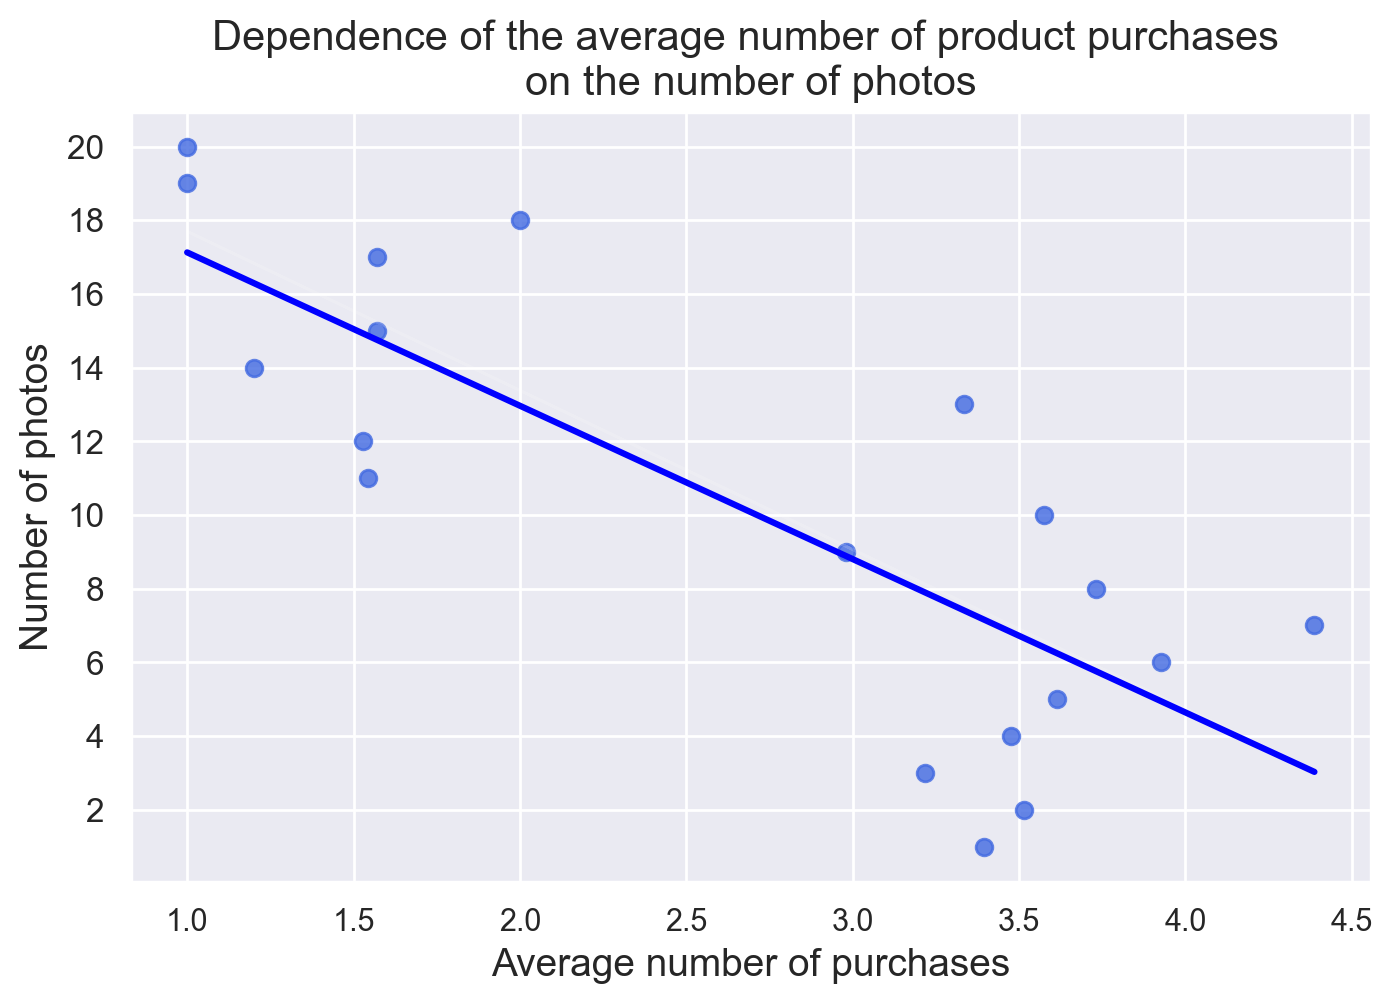

In [5]:
plt.figure(figsize=(8, 5))
sns.regplot(x='number_of_sales', y='product_photos_qty', data=vis_data, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})

plt.title('Dependence of the average number of product purchases \non the number of photos', fontsize=15)
plt.xlabel('Average number of purchases', fontsize=14)
plt.ylabel('Number of photos', fontsize=14)
plt.yticks(list(range(2, 21, 2)), fontsize=12)
plt.show()

We see a **negative**, on average, relationship between the number of product photos and the average number of sales. However, it is possible that products with a large number of photos are simply few and rare.

#### Number of characters in product description

In [6]:
print(f"Min: {vis_data_pre['product_description_lenght'].min()}, \nMax: {vis_data_pre['product_description_lenght'].max()}")

Min: 4.0, 
Max: 3992.0


In [7]:
# create bins in 20-character increments for discretization  
bins = list(range(0, int(vis_data_pre['product_description_lenght'].max()) + 20, 20))
labels = list(range(20, int(vis_data_pre['product_description_lenght'].max()) + 20, 20))
# discretizing
vis_data_pre['product_description_lenght_bins'] = pd.cut(vis_data_pre['product_description_lenght'], bins=bins, labels=labels)
# averaging the number of sales by bins
vis_data_2 = vis_data_pre.groupby('product_description_lenght_bins').agg({'number_of_sales': 'mean'}).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2028\830197695.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vis_data_2 = vis_data_pre.groupby('product_description_lenght_bins').agg({'number_of_sales': 'mean'}).reset_index()


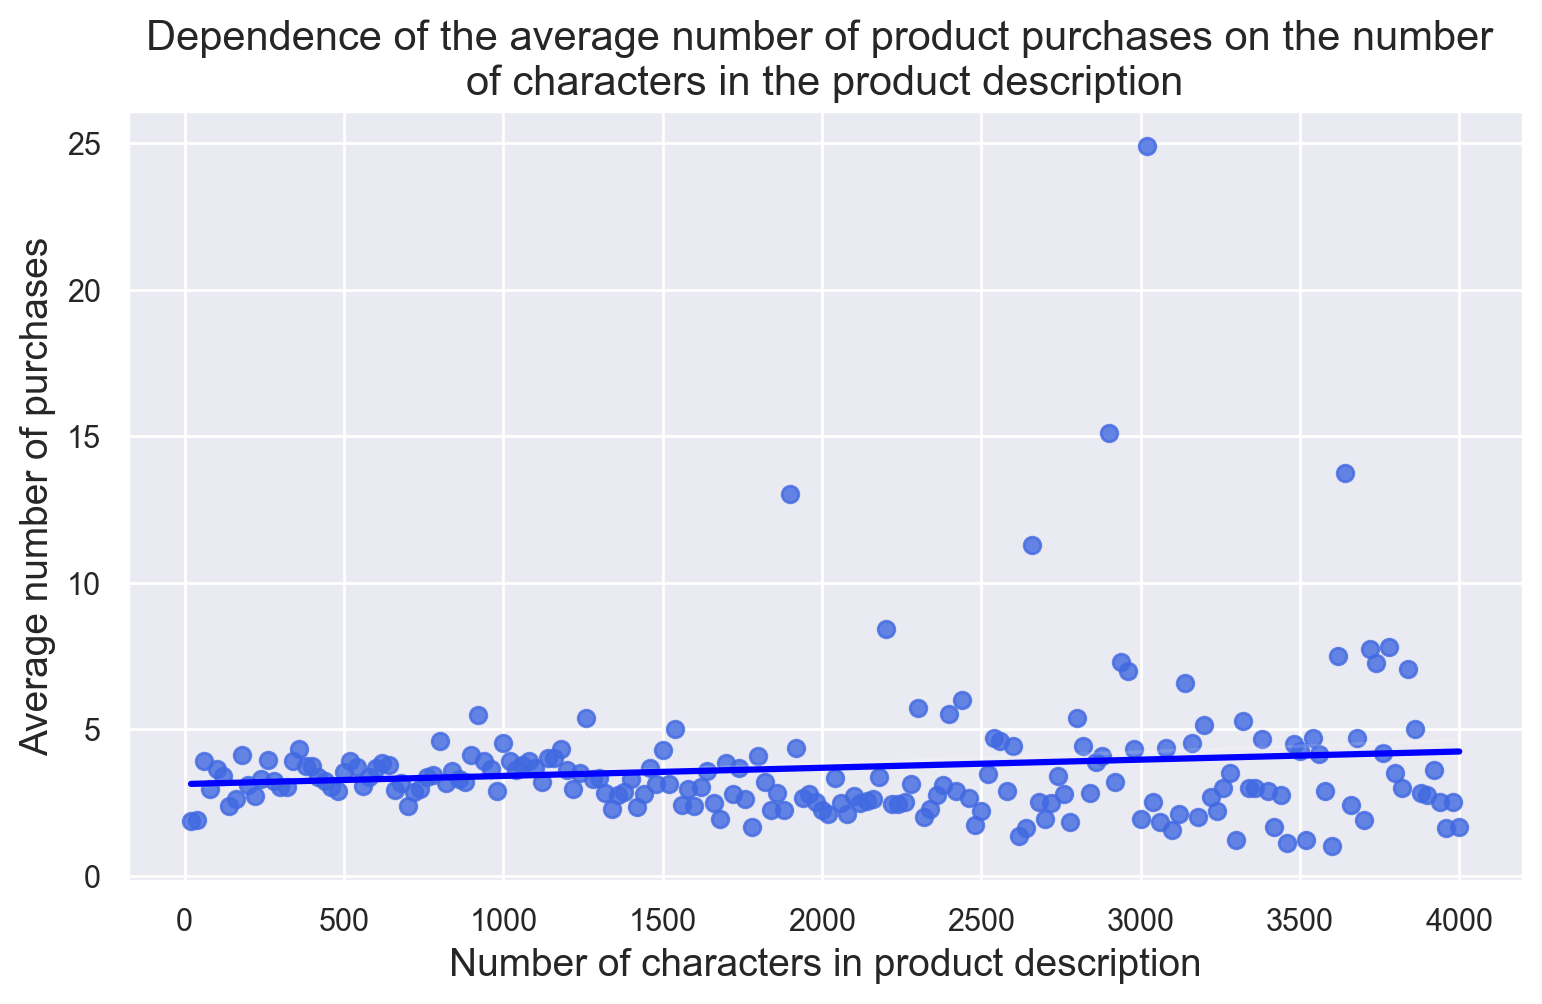

In [67]:
plt.figure(figsize=(9, 5))
sns.regplot(x='product_description_lenght_bins', 
            y='number_of_sales', 
            data=vis_data_2, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})

plt.title('Dependence of the average number of product purchases on the number \nof characters in the product description', fontsize=15)
plt.xlabel('Number of characters in product description', fontsize=14)
plt.ylabel('Average number of purchases', fontsize=14)
plt.show()

There is most likely **no relationship** between description length and the average number of product sales. The graph shows a weak positive relationship, but it is probably insignificant and is caused by outliers with a large number of sales (probably, there was just a popular product, which during binarization got one in its bin).

#### Number of characters in the product name

In [9]:
print(f"Min: {vis_data_pre['product_name_lenght'].min()}, \nMax: {vis_data_pre['product_name_lenght'].max()}")

Min: 5.0, 
Max: 76.0


In [10]:
# creating bins in increments of 5
bins = list(range(0, int(vis_data_pre['product_name_lenght'].max()) + 5, 5))
labels = list(range(5, int(vis_data_pre['product_name_lenght'].max()) + 5, 5))
# discretizing
vis_data_pre['product_name_lenght_bins'] = pd.cut(vis_data_pre['product_name_lenght'], bins=bins, labels=labels)
# averaging the number of sales by bins
vis_data_3 = vis_data_pre.groupby('product_name_lenght_bins').agg({'number_of_sales': 'mean'}).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2028\2566615772.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vis_data_3 = vis_data_pre.groupby('product_name_lenght_bins').agg({'number_of_sales': 'mean'}).reset_index()


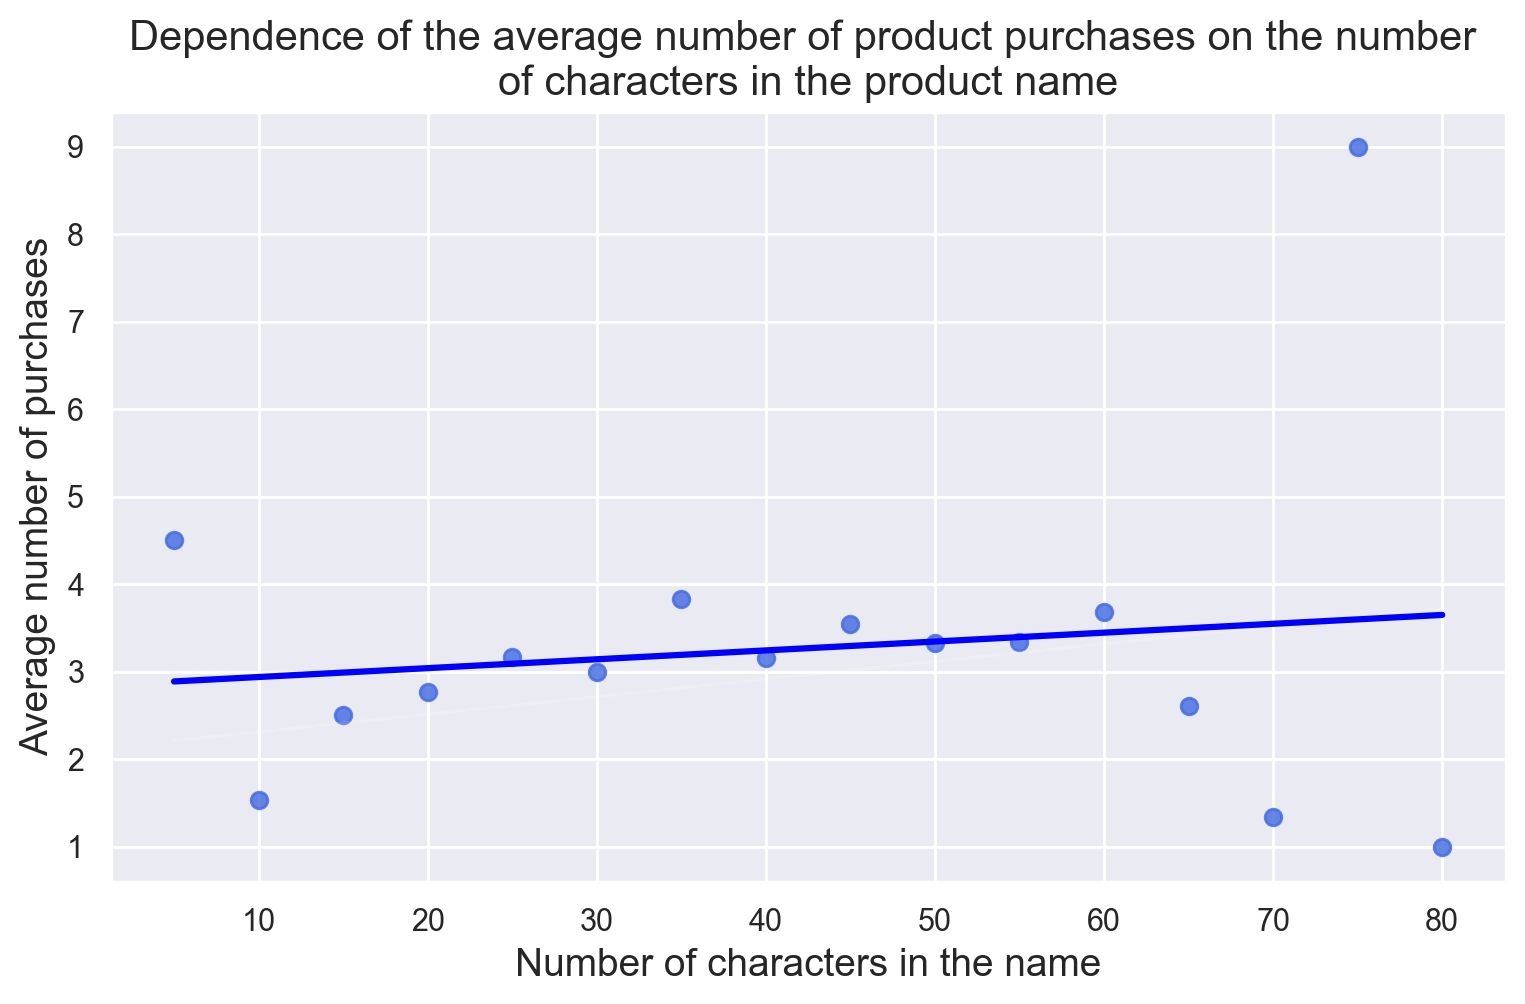

In [69]:
plt.figure(figsize=(9, 5))
sns.regplot(x='product_name_lenght_bins', y='number_of_sales', data=vis_data_3, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})

plt.title('Dependence of the average number of product purchases on the number \nof characters in the product name', fontsize=15)
plt.xlabel('Number of characters in the name', fontsize=14)
plt.ylabel('Average number of purchases', fontsize=14)
plt.show()

In general, there is no **linear relationship either**, the slight slope is probably due to the outlier. Perhaps if you remove a few outliers (goods that consist of a very small and a large name few), you might get a non-linear *quadratic relationship*.

### Task №2

Display the average payment amount by payment type (you need a payments table for this).

In [12]:
# allocation
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [13]:
# the values themselves look like this, but I'll pass the raw data to seaborn 
# so I don't lose the spread information
payments.groupby('payment_type').agg({"payment_value": "mean"}).reset_index()

payment_type  payment_value
0       boleto     145.034435
1  credit_card     163.319021
2   debit_card     142.570170
3  not_defined       0.000000
4      voucher      65.703354

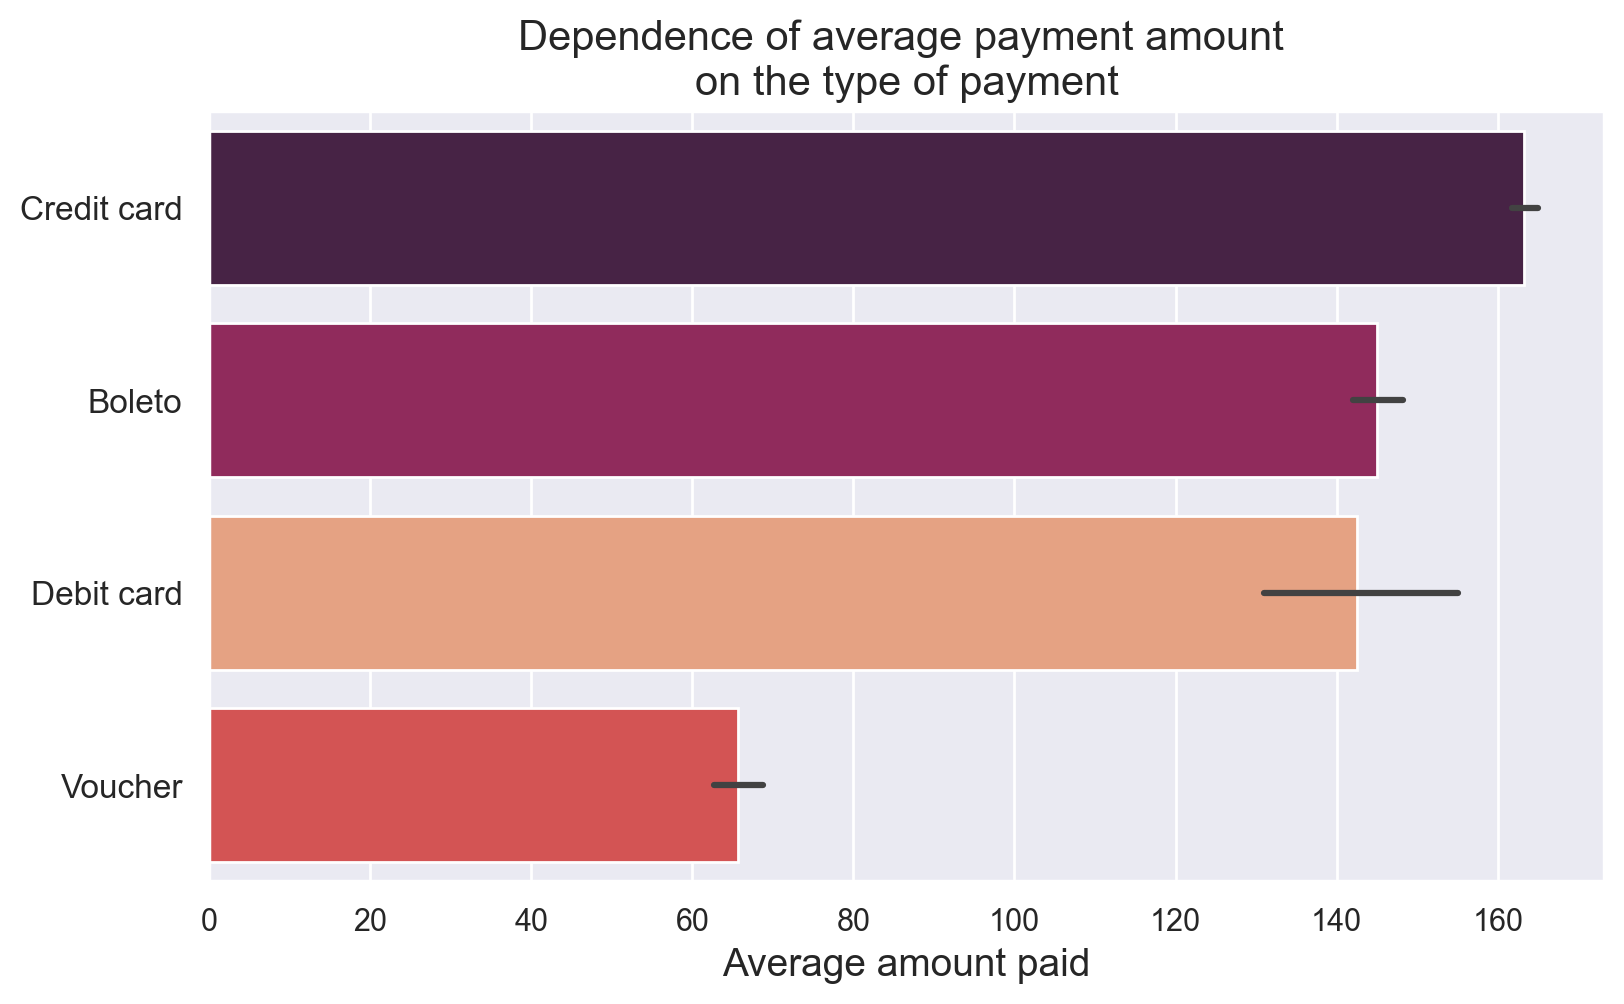

In [14]:
plt.figure(figsize=(9, 5))
sns.barplot(data=payments[payments['payment_type'] != 'not_defined'], 
            x='payment_value', 
            y='payment_type', hue='payment_type', palette='rocket',
            order=['credit_card', 'boleto', 'debit_card', 'voucher'],
            legend=False)

plt.title('Dependence of average payment amount \non the type of payment', fontsize=15)
plt.xlabel('Average amount paid', fontsize=14)
plt.ylabel('', fontsize=14)
plt.yticks(ticks=['credit_card', 'boleto', 'debit_card', 'voucher'], labels=['Credit card', 'Boleto', 'Debit card', 'Voucher'], fontsize=12)
plt.show()

Thanks to the incredible Seaborn, this graph can be plotted practically with a single function!

We can see that the **credit card** payment has both the highest mean and the lowest variance. Boleto and Debit card are practically indistinguishable, and Voucher is much smaller than the others (perhaps it's something like a gift certificate, which is not very large in amount).

### Task №3

Pay attention to the number of payments (payment_installments). Find out if the payment amount is for the whole purchase or just part of it? (Note that there is some bug in the data that needs to be investigated and accounted for)

Also show the average check as a function of the number of payments. Is there any correlation between the two?

At the beginning, I would like to do simple data checks:

In [15]:
# start by checking for nan
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
payments.describe().T

count        mean         std  min    25%    50%  \
payment_sequential    103886.0    1.092679    0.706584  1.0   1.00    1.0   
payment_installments  103886.0    2.853349    2.687051  0.0   1.00    1.0   
payment_value         103886.0  154.100380  217.494064  0.0  56.79  100.0   

                           75%       max  
payment_sequential      1.0000     29.00  
payment_installments    4.0000     24.00  
payment_value         171.8375  13664.08

We see problems: there are `payment_installments` and `payment_value` values equal to 0.

In general, large values of `payment_sequential` and `payment_installments` can also be researched.

In [17]:
payments[payments['payment_installments'] == 0]

order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94

In [18]:
payments[payments['payment_value'] == 0]

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

Cases with payment 0 a little bit.

In [19]:
payments['order_id'].value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [20]:
payments[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential payment_type  \
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
9985    fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
14321   fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
17274   fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565   fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   
23074   fa65dad1b0e818e3ccc5cb0e39231352                   2      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
28330   fa65dad1b0e818e3ccc5cb0e39231352                   5      voucher   
29648   fa65dad1b0e818e3ccc5cb0e39231352                   6      voucher   
32519   fa65dad1b0e818e3ccc5cb0e39231352                  11      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
63369   fa65dad1b0e818e3ccc5cb0e39231352                  15      voucher   
65641   fa65dad1b0e818e3ccc5cb0e39231352                   3      voucher   
68853   fa65dad1b0e818e3ccc5cb0e39231352                   8      voucher   
73537   fa65dad1b0e818e3ccc5cb0e39231352                  12      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
78050   fa65dad1b0e818e3ccc5cb0e39231352                  16      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
79670   fa65dad1b0e818e3ccc5cb0e39231352                  17      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   
82593   fa65dad1b0e818e3ccc5cb0e39231352                   7      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   

        payment_installments  payment_value  
4885                       1          66.02  
9985                       1          29.16  
14321                      1           3.71  
17274                      1           1.08  
19565                      1          12.86  
23074                      1           8.51  
24879                      1           3.68  
28330                      1           0.66  
29648                      1           5.02  
32519                      1           4.03  
36822                      1           0.00  
39108                      1          19.26  
39111                      1          29.05  
63369                      1          14.04  
65641                      1           2.95  
68853                      1          26.02  
73537                      1           3.60  
74239                      1           4.11  
74721                      1           5.02  
77885                      1           0.00  
78050                      1          12.86  
79587                      1          28.27  
79670                      1           3.72  
80321                      1           0.73  
82593                      1           0.32  
85166                      1          18.86  
93337                      1         150.00  
99213                      1           0.42  
100606                     1           4.03

Strangely, in the example above, `payment_installments` is 1 everywhere, even though there are actually 29 payments (and all different).

In [21]:
payments[payments['payment_installments'] == 24]

order_id  payment_sequential payment_type  \
2970    70b7e94ea46d3e8b5bc12a50186edaf0                   1  credit_card   
10791   859f516f2fc3f95772e63c5757ab0d5b                   1  credit_card   
12307   ff36cbc44b8f228e0449c92ef089c843                   1  credit_card   
18512   2b7dbe9be72b8f9733844c31055c0825                   1  credit_card   
21713   6ae2e8b8fac02522481d2a2f4ca4412c                   1  credit_card   
23024   90f864fe19d11549fa01eb81c4dd87e3                   1  credit_card   
36088   84d2098c97827c6327ed4d7be95e1fc8                   1  credit_card   
50401   ffb18bf111fa70edf316eb0390427986                   1  credit_card   
52846   63dbe0c8e63e5f1b4deec09d4f044a7f                   1  credit_card   
55094   fcbb6af360b31b05460c2c8e524588c0                   1  credit_card   
60027   ef71772d55431467890fda2f45c7bdde                   1  credit_card   
63893   d8d5cc8b2d42cce90b7ea35e5691a7b1                   1  credit_card   
66746   fe808fc011ee4ae41f2ed8d1d52b6670                   1  credit_card   
82431   1800f4a4362310d7eb38281634f6dfd1                   1  credit_card   
87593   61450e6c8f56d52e46a198e57df7d731                   1  credit_card   
90639   d74fca7ee2ce7587c45eefb0fea95ed8                   1  credit_card   
102008  f60ce04ff8060152c83c7c97e246d6a8                   1  credit_card   
102435  e02d61b42452cc6737650331d8bc8ad7                   1  credit_card   

        payment_installments  payment_value  
2970                      24         274.84  
10791                     24         609.56  
12307                     24         756.49  
18512                     24         345.39  
21713                     24         433.43  
23024                     24         588.58  
36088                     24         286.78  
50401                     24         617.24  
52846                     24         771.69  
55094                     24        1194.38  
60027                     24         629.64  
63893                     24         599.18  
66746                     24         241.42  
82431                     24         325.37  
87593                     24         252.09  
90639                     24        1099.00  
102008                    24        1440.10  
102435                    24         515.70

In the example above — on the contrary, 24 payment periods are selected (for example, a loan for 2 years), but there is 1 record of payment everywhere. It is possible that the bank paid for the client once, and then the client pays to the bank and not to the marketplace.

In [22]:
# in the process of analysis it was found out that the orders table has more unique orders than the items table
# at first I was very confused by this, but then I looked at the "extra" ones and saw that they were all problematic.
# so we can overlook them
bad_orders = orders[orders['order_id'].isin(set(orders['order_id'].unique()) - set(items['order_id'].unique()))]

In [23]:
bad_orders['order_status'].value_counts()

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

#### `payment_value` — for the whole purchase or just a part?

Once we understand this, we can decide what to do with problematic cases when `payment_sequential` is not coordinated with `payment_installments`.

In [24]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [25]:
payments_orders = pd.merge(payments, orders)
payments.shape, orders.shape

((103886, 5), (99441, 8))

We see that there are more rows in the payments table than unique orders.

In [26]:
# calculate orders real price
orders_items = pd.merge(orders, items)
orders_price = orders_items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
orders_price['full_price'] = orders_price['price'] + orders_price['freight_value']
# merge all info
payments_orders_price = pd.merge(payments_orders, orders_price)
# test the hypothesis: payment_value contains the price of the entire order
# then we can take the first value during aggregation and it will be equal to full_price (which is the same for all lines inside the order)
grouped_pay = payments_orders_price.groupby('order_id').agg({'payment_value': 'first', 'full_price': 'first'}).reset_index()

In [27]:
grouped_pay.sample(5)

order_id  payment_value  full_price
96663  fad263c690ebcbd7b6655a2d7e0d0df6          43.95       43.95
63637  a5db57e596494a2570d250dea03da4ce          36.69       36.69
66179  ac4d559cefc486f4ac59c17fc44f236c         104.37      104.37
40722  69bf2d63fa24ceda9a9045233d315833         126.89      126.89
71245  b8fffd71202e7086dd751c257751b3dd          37.24       37.24

In [28]:
np.allclose(grouped_pay['payment_value'], grouped_pay['full_price'])

False

It seems that the `payment_value` field does specify `full_price`, however `np.allclose` returns `False`.
Let's look at the differences (let's say where the absolute difference is greater than 1 to avoid numerical problems when aggregating):

In [29]:
bad_mask = (grouped_pay['payment_value'] - grouped_pay['full_price']).abs() > 1
bad_payments = grouped_pay[bad_mask]

In [30]:
payments_orders_price[payments_orders_price['order_id'].isin(bad_payments['order_id'])][['payment_value', 'price', 'freight_value', 'full_price']].head()

payment_value   price  freight_value  full_price
25          45.17  689.99          20.59      710.58
26         665.41  689.99          20.59      710.58
36         173.84  181.90          16.02      197.92
37          24.08  181.90          16.02      197.92
76          57.53  115.20          38.07      153.27

In [31]:
payments_orders_price[payments_orders_price['order_id'].isin(bad_payments['order_id'])]['payment_type'].value_counts()

payment_type
voucher        4490
credit_card    2999
debit_card       10
Name: count, dtype: int64

In [32]:
bad_mask.sum() / orders.shape[0]

0.03158656892026428

In [33]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

So, to summarize:
- in most cases the `payment_value` field shows the full value of the order every time
- but in about 3% of orders there is a specific tranche amount.
    - these problems are most common when paying by voucher (60% of cases), 
        - probably these are all cases of voucher payment when there was more than 1 payment.
    - less often with credit card (about 40% of cases), 
    - and very rarely with debit card (< 1%)
- zero-payment cases can be recognized as statistically insignificant, and they often appear in the problem cases described above. 

I see **the solution** as follows:
1. count how many times the payment_sequential field was encountered within each order (== how many payments were made)
2. compare this counter with the value of payment_installments
    1. if the payment_sequential counter is greater than the payment_installments value (it means that there were more payments than the system reports, i.e. a bug), then take the payment_sequential counter as the real number of payments
    2. otherwise leave the payment_sequential value as the real number of payments (we consider that not all payments have been made yet)

This will also solve the bug when payment_installments is 0.

To solve the problem with payment equal to 0, as well as orders where the `payment_value` field contained the value of a particular payment and not the sum of the whole order (almost all voucher payment cases), I will take the sum by order_id from the merged orders and items table, where the sums should be correct, as the value of the check, for aggregation and getting the average check.

In [34]:
# payment_installments are the same within the same order_id, as is full_price
vis_data_13 =  payments_orders_price.groupby('order_id').agg({'payment_sequential': 'count', 'payment_installments': 'max', 'full_price': 'first'}).reset_index()
# field to be filled in
vis_data_13['count_of_payments'] = None

In [35]:
vis_data_13.head()

order_id  payment_sequential  payment_installments  \
0  00010242fe8c5a6d1ba2dd792cb16214                   1                     2   
1  00018f77f2f0320c557190d7a144bdd3                   1                     3   
2  000229ec398224ef6ca0657da4fc703e                   1                     5   
3  00024acbcdf0a6daa1e931b038114c75                   1                     2   
4  00042b26cf59d7ce69dfabb4e55b4fd9                   1                     3   

   full_price count_of_payments  
0       72.19              None  
1      259.83              None  
2      216.87              None  
3       25.78              None  
4      218.04              None

In [36]:
vis_data_13[vis_data_13['payment_sequential'] == 29]

order_id  payment_sequential  \
96501  fa65dad1b0e818e3ccc5cb0e39231352                  29   

       payment_installments  full_price count_of_payments  
96501                     1      457.99              None

In [37]:
payments[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']['payment_value'].sum()

457.99

Now this order is accounted for correctly, whereas before it looked like this (i.e. actually `payment_installments` here should be equal to 29 (if you take into account zero payment)):

In [38]:
payments[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential payment_type  \
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
9985    fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
14321   fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
17274   fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565   fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   
23074   fa65dad1b0e818e3ccc5cb0e39231352                   2      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
28330   fa65dad1b0e818e3ccc5cb0e39231352                   5      voucher   
29648   fa65dad1b0e818e3ccc5cb0e39231352                   6      voucher   
32519   fa65dad1b0e818e3ccc5cb0e39231352                  11      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
63369   fa65dad1b0e818e3ccc5cb0e39231352                  15      voucher   
65641   fa65dad1b0e818e3ccc5cb0e39231352                   3      voucher   
68853   fa65dad1b0e818e3ccc5cb0e39231352                   8      voucher   
73537   fa65dad1b0e818e3ccc5cb0e39231352                  12      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
78050   fa65dad1b0e818e3ccc5cb0e39231352                  16      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
79670   fa65dad1b0e818e3ccc5cb0e39231352                  17      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   
82593   fa65dad1b0e818e3ccc5cb0e39231352                   7      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   

        payment_installments  payment_value  
4885                       1          66.02  
9985                       1          29.16  
14321                      1           3.71  
17274                      1           1.08  
19565                      1          12.86  
23074                      1           8.51  
24879                      1           3.68  
28330                      1           0.66  
29648                      1           5.02  
32519                      1           4.03  
36822                      1           0.00  
39108                      1          19.26  
39111                      1          29.05  
63369                      1          14.04  
65641                      1           2.95  
68853                      1          26.02  
73537                      1           3.60  
74239                      1           4.11  
74721                      1           5.02  
77885                      1           0.00  
78050                      1          12.86  
79587                      1          28.27  
79670                      1           3.72  
80321                      1           0.73  
82593                      1           0.32  
85166                      1          18.86  
93337                      1         150.00  
99213                      1           0.42  
100606                     1           4.03

Now I will place the «correct» value of the number of payments for visualization purposes.

In [39]:
# get indexes of orders that match and do not match my algorithm
bad_index = vis_data_13.loc[vis_data_13['payment_sequential'] > vis_data_13['payment_installments']].index
good_index = vis_data_13.loc[vis_data_13['payment_sequential'] <= vis_data_13['payment_installments']].index
# put the values
vis_data_13.loc[vis_data_13['payment_sequential'] > vis_data_13['payment_installments'], 'count_of_payments'] = vis_data_13.iloc[bad_index]['payment_sequential']
vis_data_13.loc[vis_data_13['payment_sequential'] <= vis_data_13['payment_installments'], 'count_of_payments'] = vis_data_13.iloc[good_index]['payment_installments']

In [40]:
vis_data_13

order_id  payment_sequential  \
0      00010242fe8c5a6d1ba2dd792cb16214                   1   
1      00018f77f2f0320c557190d7a144bdd3                   1   
2      000229ec398224ef6ca0657da4fc703e                   1   
3      00024acbcdf0a6daa1e931b038114c75                   1   
4      00042b26cf59d7ce69dfabb4e55b4fd9                   1   
...                                 ...                 ...   
98660  fffc94f6ce00a00581880bf54a75a037                   1   
98661  fffcd46ef2263f404302a634eb57f7eb                   1   
98662  fffce4705a9662cd70adb13d4a31832d                   1   
98663  fffe18544ffabc95dfada21779c9644f                   1   
98664  fffe41c64501cc87c801fd61db3f6244                   1   

       payment_installments  full_price count_of_payments  
0                         2       72.19                 2  
1                         3      259.83                 3  
2                         5      216.87                 5  
3                         2       25.78                 2  
4                         3      218.04                 3  
...                     ...         ...               ...  
98660                     1      343.40                 1  
98661                     1      386.53                 1  
98662                     3      116.85                 3  
98663                     3       64.71                 3  
98664                     1       55.79                 1  

[98665 rows x 5 columns]

In [41]:
vis_data_13['count_of_payments'].value_counts()

count_of_payments
1     45840
2     13763
3     10624
4      7120
10     5265
5      5238
8      4247
6      3921
7      1638
9       643
12      139
15       76
11       30
18       27
13       19
24       18
14       17
20       17
17        7
16        5
21        4
22        2
19        2
23        1
26        1
29        1
Name: count, dtype: int64

Let's try not to lose information about the variance of values within categories and build a `relplot`:

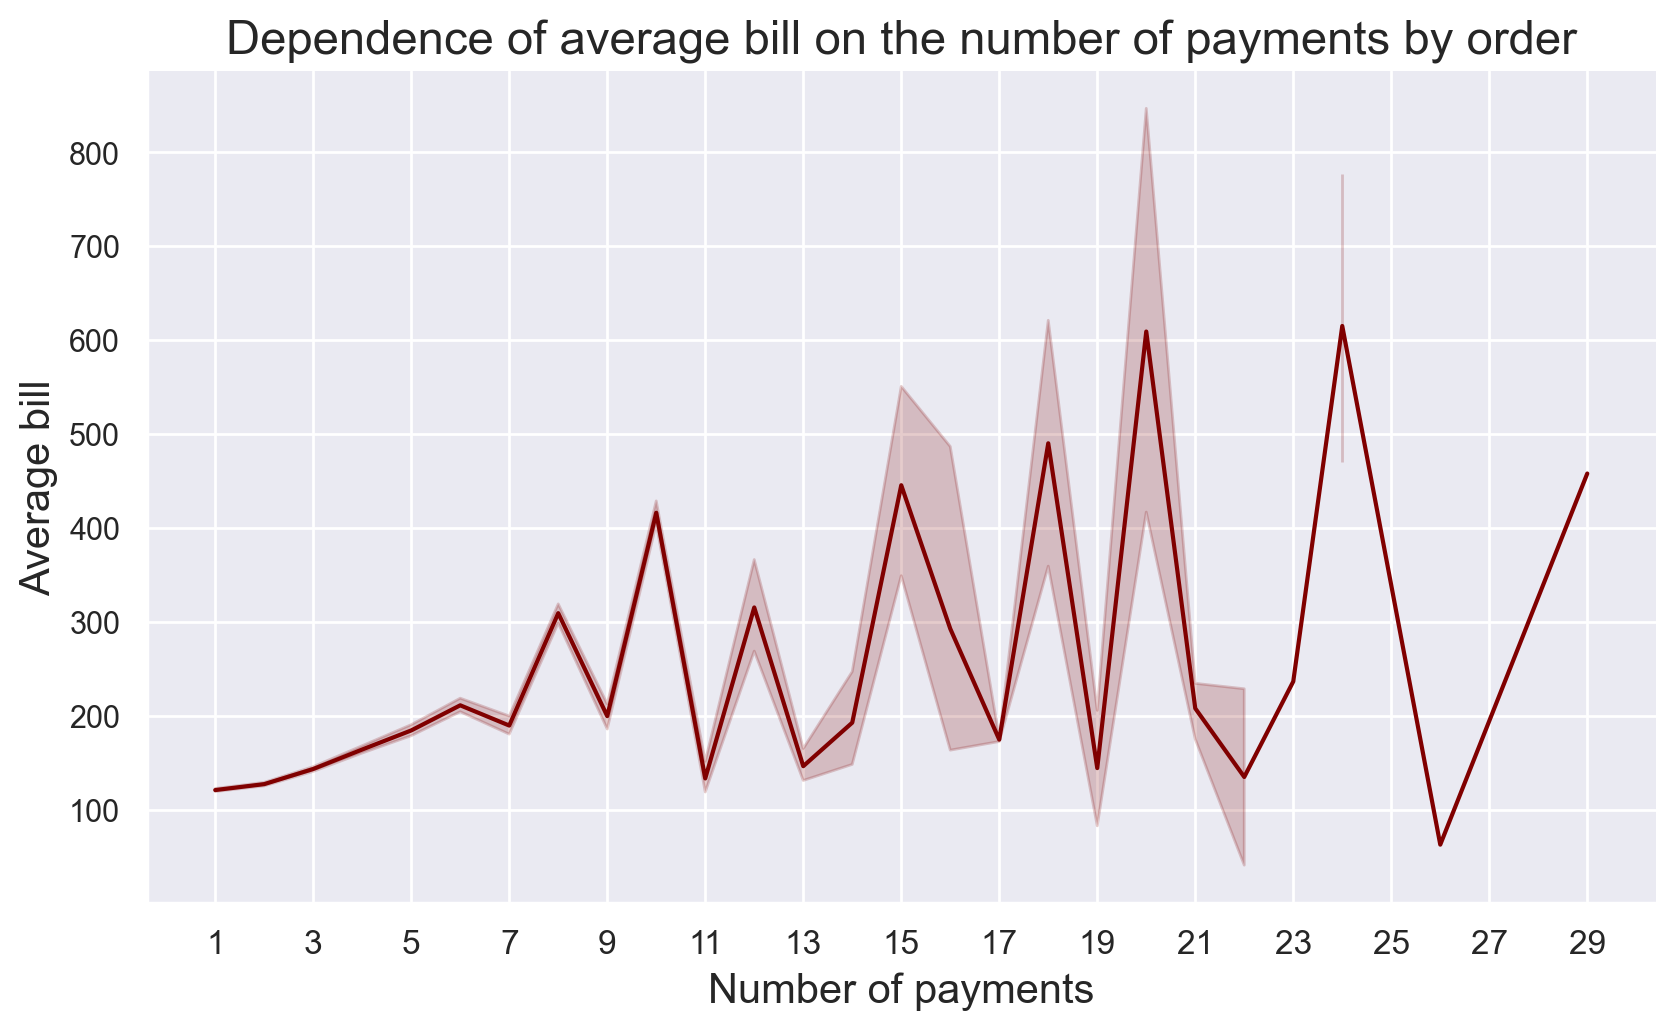

In [42]:
sns.relplot(x='count_of_payments',
            y='full_price',
            legend=False,
            kind='line',
            height=5,
            aspect=1.7,
            color='Maroon',
            data=vis_data_13)

plt.title('Dependence of average bill on the number of payments by order', fontsize=17)
plt.xlabel('Number of payments', fontsize=15)
plt.ylabel('Average bill', fontsize=15)
plt.xticks(np.arange(1, vis_data_13['count_of_payments'].max() + 1, 2), fontsize=12)
plt.show()

There may be very little data on a large number of payments. We can also look at `regplot` and `scatterplot`:

In [43]:
vis_data_14 = vis_data_13.groupby('count_of_payments').agg({'full_price': 'mean', 'order_id': 'count'}).reset_index()
vis_data_14.head()

count_of_payments  full_price  order_id
0                  1  120.833070     45840
1                  2  127.158449     13763
2                  3  143.284881     10624
3                  4  164.032527      7120
4                  5  184.344309      5238

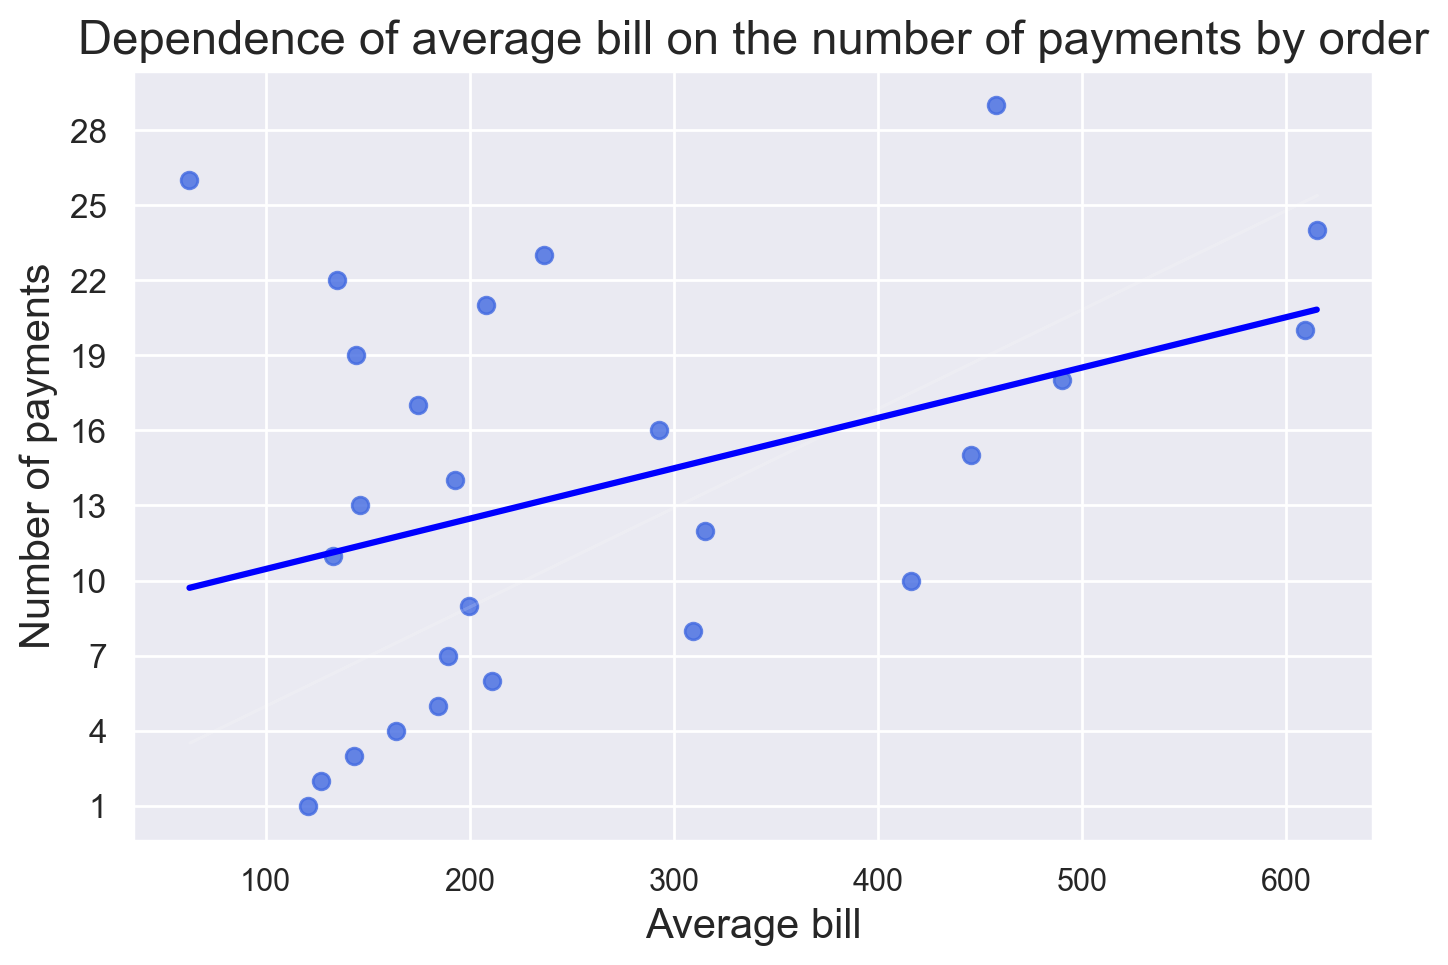

In [44]:
plt.figure(figsize=(8, 5))
sns.regplot(x='full_price', y='count_of_payments', data=vis_data_14, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})

plt.title('Dependence of average bill on the number of payments by order', fontsize=17)
plt.xlabel('Average bill', fontsize=15)
plt.ylabel('Number of payments', fontsize=15)
plt.yticks(np.arange(1, vis_data_13['count_of_payments'].max() + 1, 3), fontsize=12)
plt.show()

On average, **the correlation is positive and quite strong**. The greater the number of payments — the greater the average check.

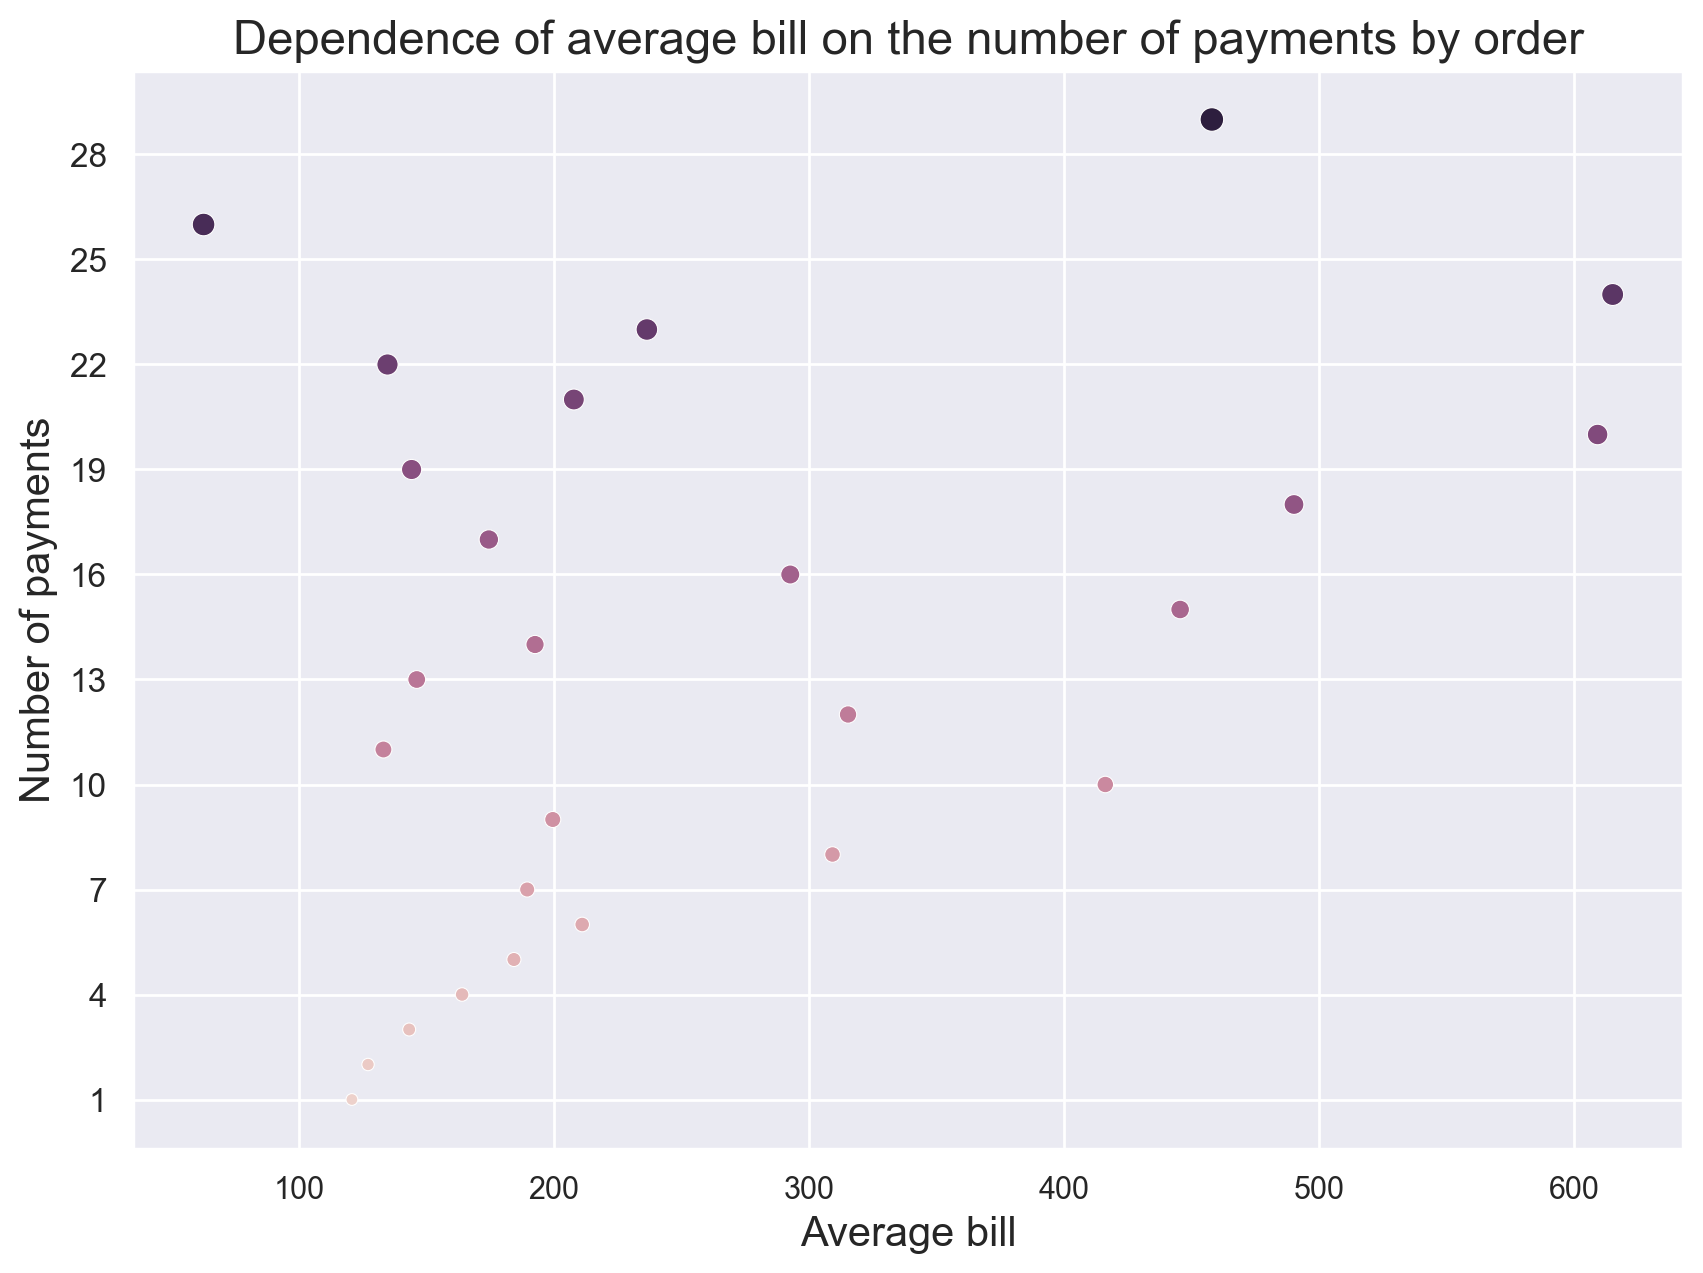

In [45]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=vis_data_14, 
                x='full_price', 
                y='count_of_payments', 
                hue='count_of_payments',
                size='count_of_payments',
                legend=False
                )

plt.title('Dependence of average bill on the number of payments by order', fontsize=17)
plt.xlabel('Average bill', fontsize=15)
plt.ylabel('Number of payments', fontsize=15)
plt.yticks(np.arange(1, vis_data_13['count_of_payments'].max() + 1, 3), fontsize=12)
plt.show()

So, we can see a *clear relationship for small numbers of payments* (up to 10). Also a large order value, on average, for «classic» for loans and installments 12 and 24 payments (usually 12 and 24 months). For large numbers of payments there are not so many examples, so their data can be considered assignable. But, on average, the correlation is positive.

### Task №4

Visualize the relationship between order price and shipping price by state of purchase. Is there any dependency and how can you justify it?

In [46]:
# merge orders and items
orders_items = pd.merge(orders, items)
# calculate the cost of each order
orders_price = orders_items.groupby(['order_id', 'customer_id']).agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
# full price
orders_price['full_price'] = orders_price['price'] + orders_price['freight_value']
# add customer info
vis_data_10 = pd.merge(orders_price, customers)

In [47]:
# unique states in sellers and customers
customers['customer_state'].unique().shape[0], vis_data_10['customer_state'].unique().shape[0]

(27, 27)

In order to better analyze the relationship between order price and shipping price, I will first try to average the data by state and depict them on one graph, and then — make different graphs for different states.

In [48]:
# averaging across states of customer
vis_data_10_by_states = vis_data_10.groupby('customer_state').agg({'price': 'mean', 'freight_value': 'mean', 'full_price': 'mean'}).reset_index()

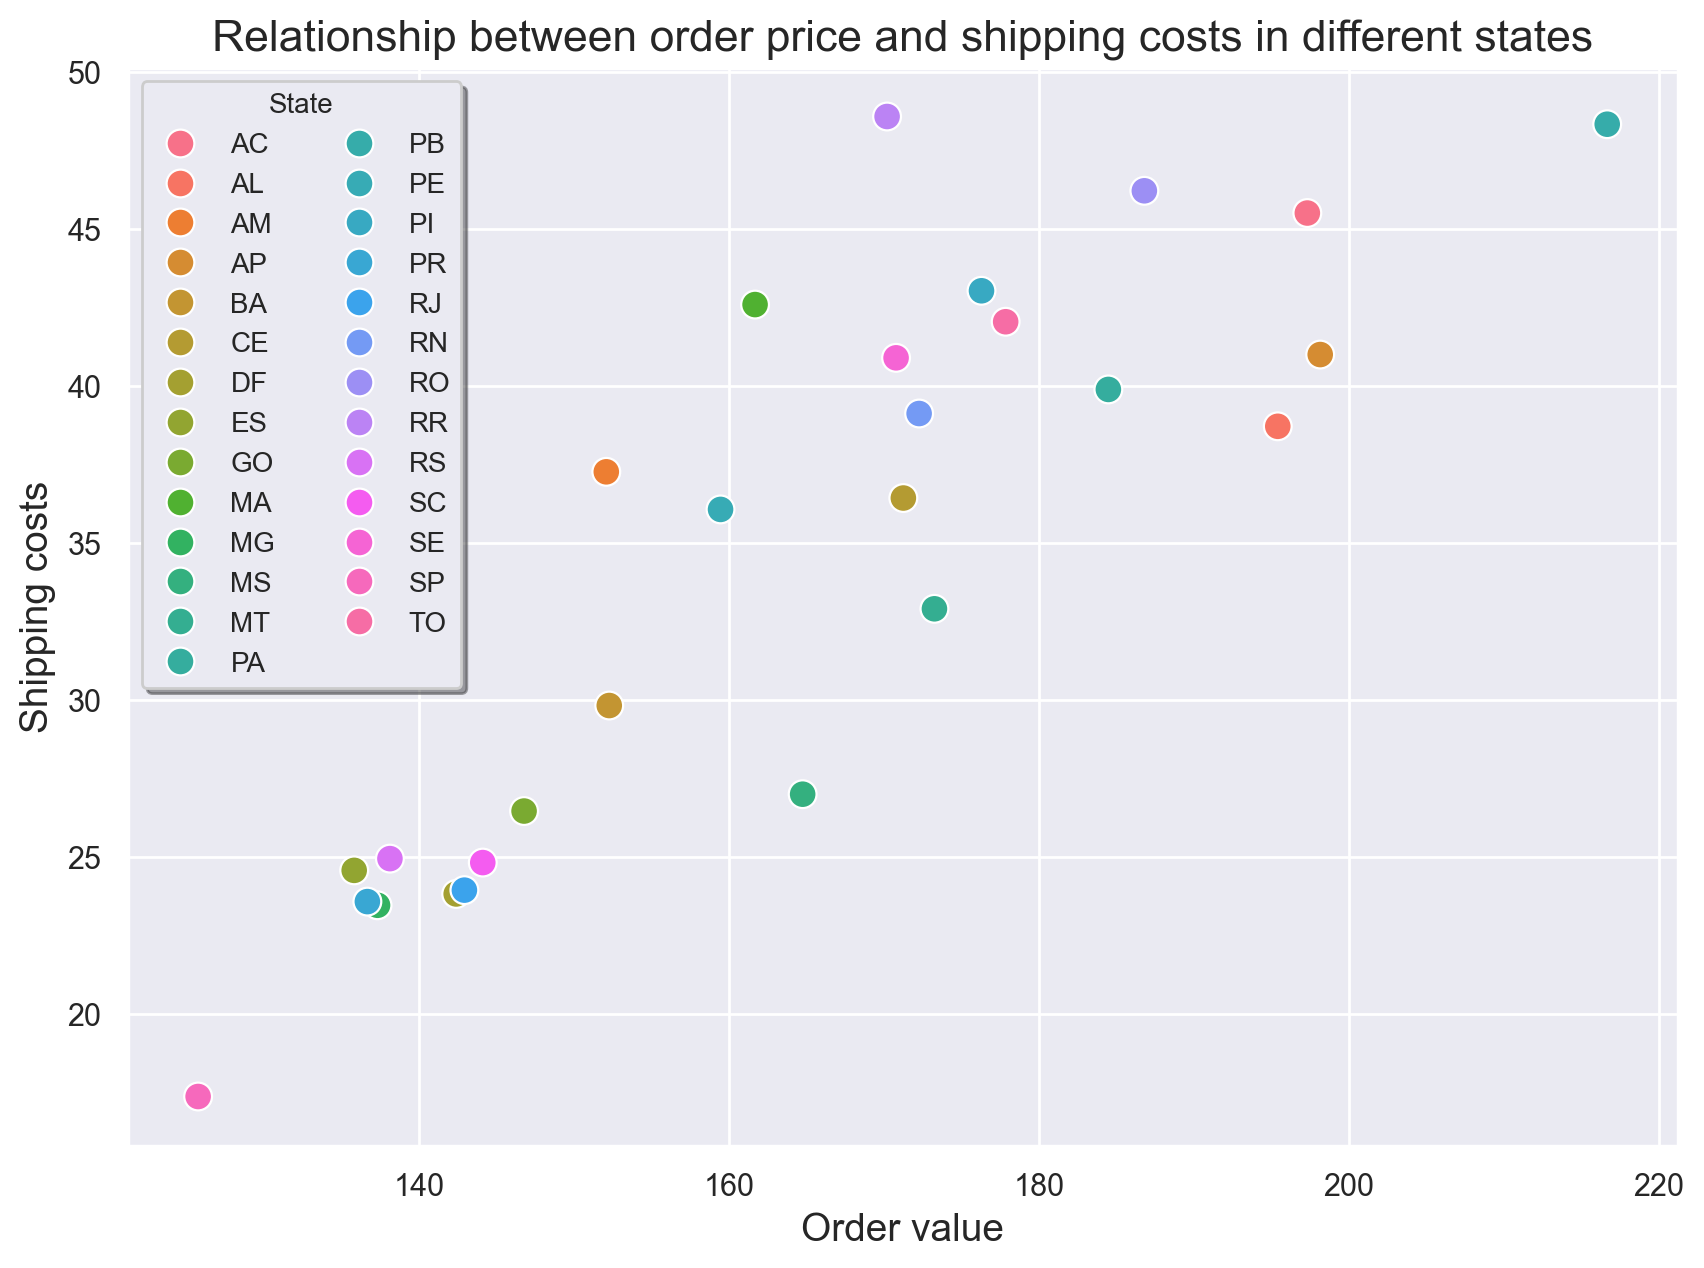

In [49]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=vis_data_10_by_states, 
                x='price', 
                y='freight_value', 
                hue='customer_state',
                s=100)

plt.title('Relationship between order price and shipping costs in different states', fontsize=16)
plt.xlabel('Order value', fontsize=14)
plt.ylabel('Shipping costs', fontsize=14)
plt.legend(title='State', title_fontsize=10, fontsize=10, ncol=2, loc='best', shadow=True);

On average, across states, we see a linear relationship within the country. But what if we look within states?

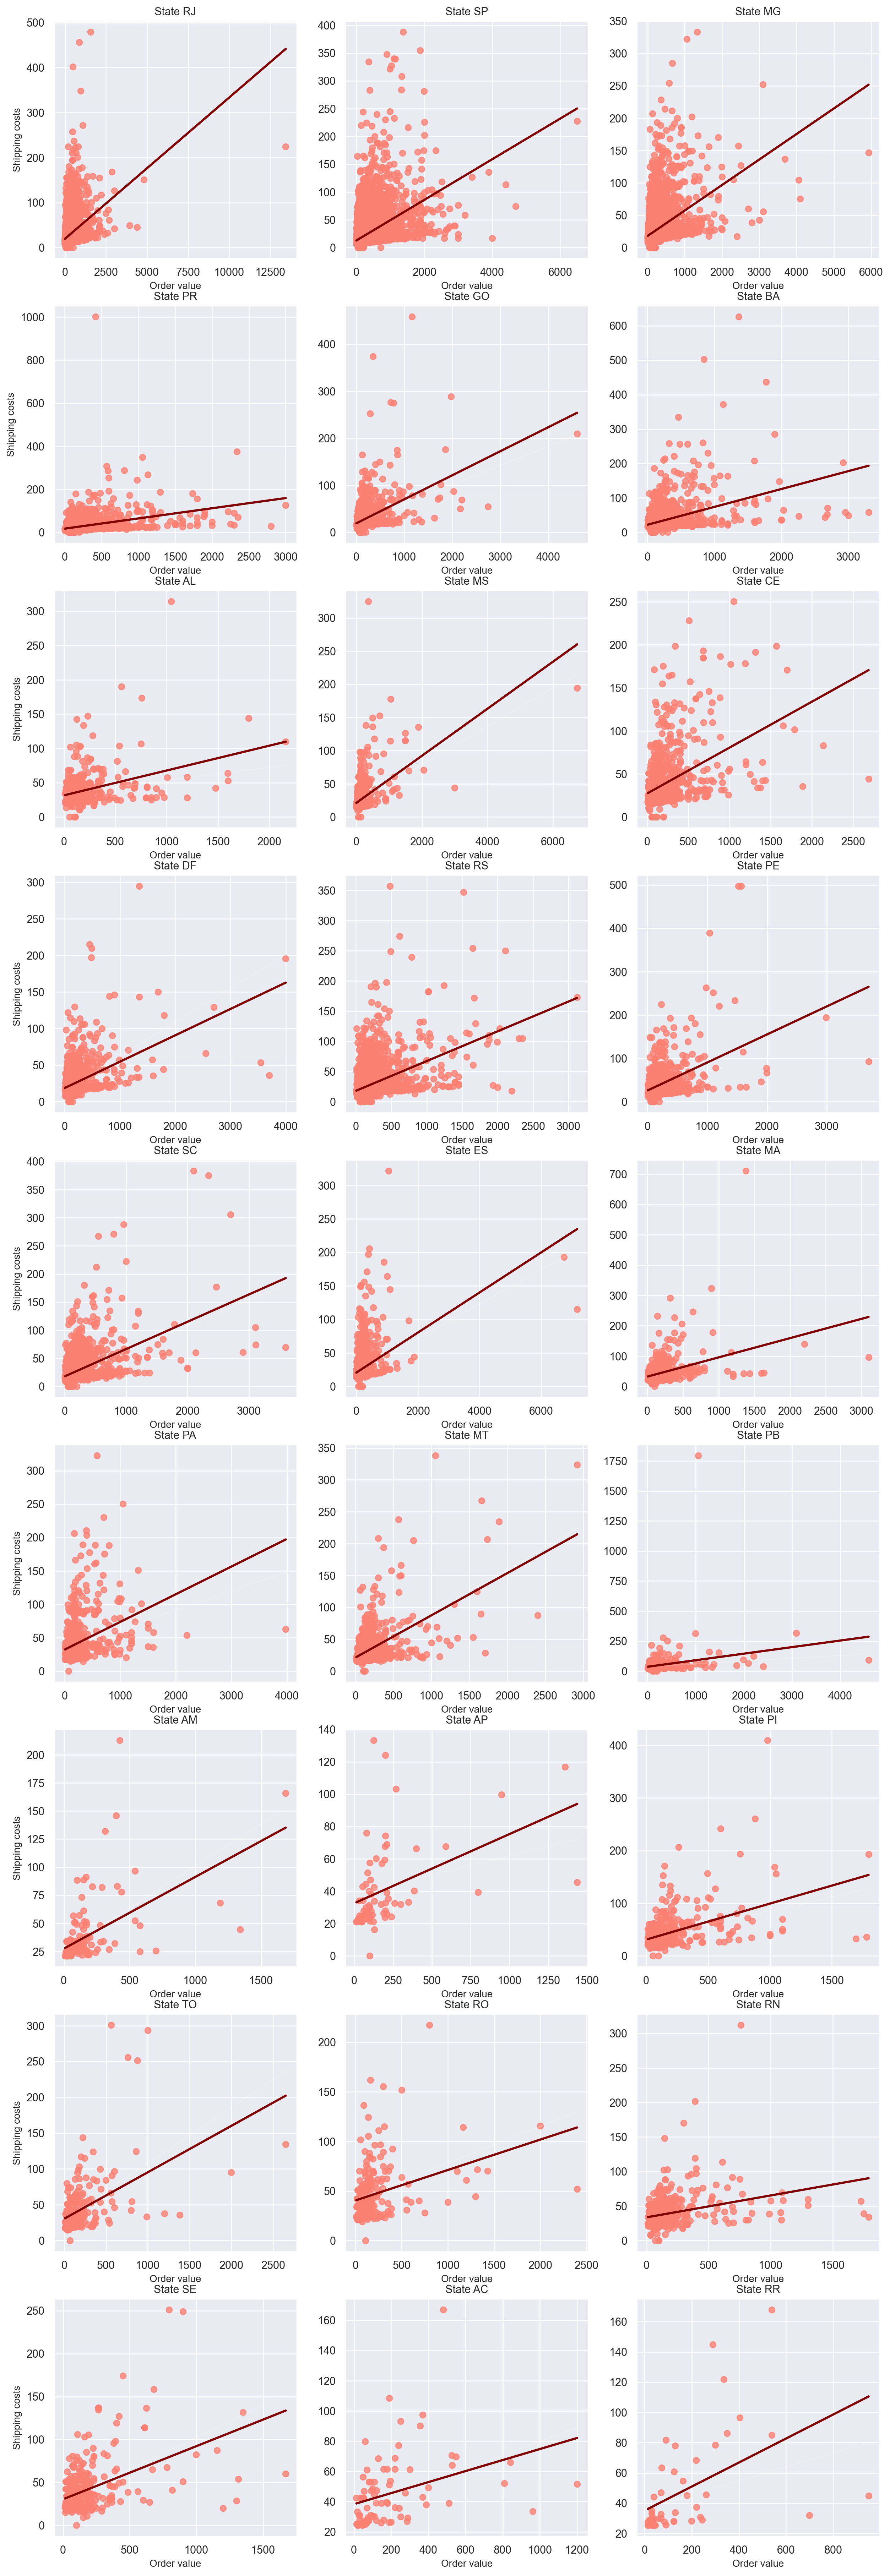

In [50]:
states = vis_data_10['customer_state'].unique()

plt.figure(figsize=(15, 46))
for i, state in enumerate(states):
    plt.subplot(len(states) // 3, 3, i + 1)
    subset = vis_data_10[vis_data_10['customer_state'] == state][['price', 'freight_value']]
    sns.regplot(x='price', y='freight_value', data=subset, n_boot=1, scatter_kws={"color": "salmon"}, line_kws={"color": "maroon"})
    plt.xlabel('Order value', fontsize=10)
    plt.title(f'State {state}', fontsize=11)
    if i + 1 in (1, 4, 7, 10, 13, 16, 19, 22, 25):
        plt.ylabel('Shipping costs', fontsize=10)
    else:
        plt.ylabel('', fontsize=12)
plt.show()

Most of the time *the correlation is strong positive*, but *sometimes it weakens a lot* (like in PR, BA, AL, PB, RN states) or, on the contrary, it *strengthens*.

I think this could have the following reasons:
1. Either it's a state with poor infrastructure (rural areas, swamps), hence the increase in order value (and thus weight) gives a very strong increase in shipping costs
2. or, on the contrary, it may be a highly urbanized state (it may even be a region consisting of one city, like Moscow), where 
    1. the cost of delivery is low => it is itself on average lower, plus the distances themselves are shorter
    2. the increase in delivery cost is related only to the number of kilometers a truck has to travel to a customer / order pickup point, which has a lower elasticity than in category #1.

### Task №5

Display the distribution of grades for orders that were delivered on time and those that arrived late. How much does the fact of being late affect the grade? 

P.S. grades are taken from the reviews table.

In [51]:
import datetime as dt

# delivered orders
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()
# convert the strings to date format and add 23 hours 59 minutes, because now order_estimated_delivery_date
# everywhere is 00:00, because the prediction of delivery is usually made in relation to a specific day
# if you don't take this into account, when comparing orders that arrived on that day will be considered late
delivered_orders['order_estimated_delivery_date_dt'] = pd.to_datetime(delivered_orders['order_estimated_delivery_date']) + dt.timedelta(hours=23, minutes=59, seconds=59)
delivered_orders['order_delivered_customer_date_dt'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])
# flag that the order was delivered on time
delivered_orders['delivered_earlier'] = delivered_orders['order_delivered_customer_date_dt'] < delivered_orders['order_estimated_delivery_date_dt']

In [52]:
delivered_orders['delivered_earlier'].value_counts()  # a large majority of orders are delivered on time

delivered_earlier
True     89936
False     6542
Name: count, dtype: int64

In [53]:
# combining orders and reviews
delivered_orders_reviews = pd.merge(delivered_orders, reviews)

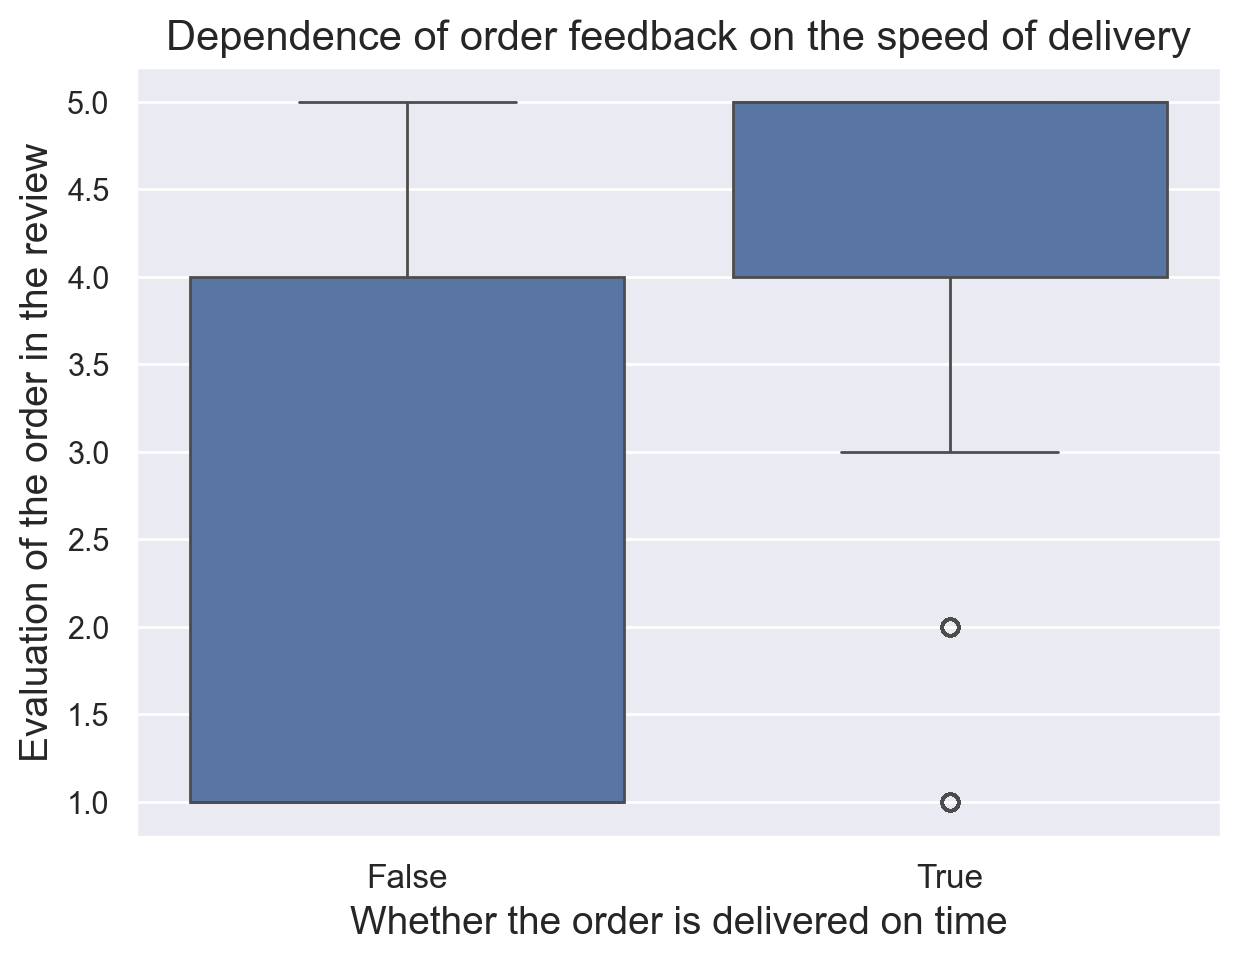

In [54]:
plt.figure(figsize=(7, 5))

sns.boxplot(data=delivered_orders_reviews, x='delivered_earlier', y='review_score')
plt.title('Dependence of order feedback on the speed of delivery', fontsize=15)
plt.xlabel('Whether the order is delivered on time', fontsize=14)
plt.ylabel('Evaluation of the order in the review', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

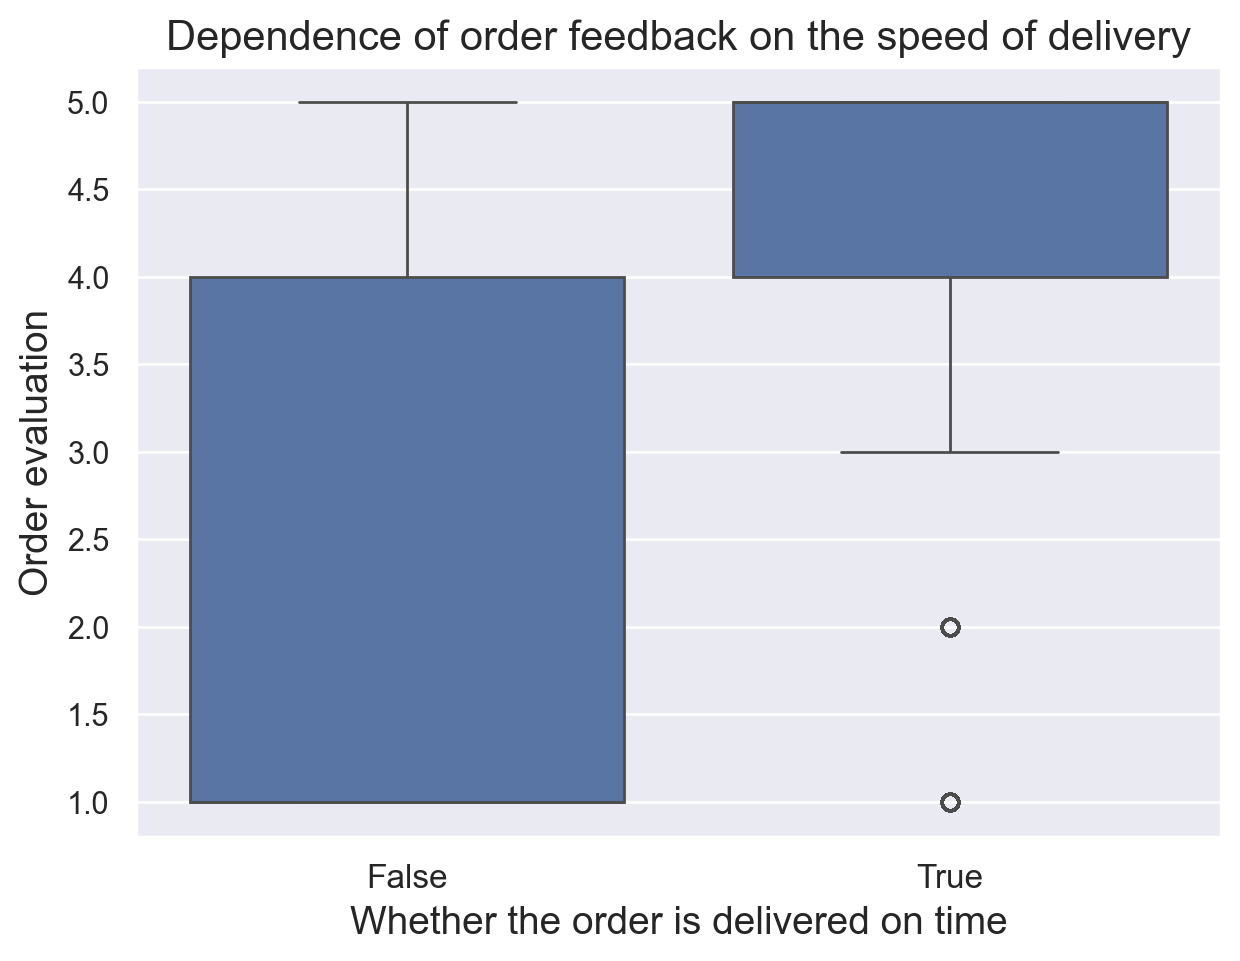

In [75]:
plt.figure(figsize=(7, 5))

sns.boxplot(data=delivered_orders_reviews, x='delivered_earlier', y='review_score')
plt.title('Dependence of order feedback on the speed of delivery', fontsize=15)
plt.xlabel('Whether the order is delivered on time', fontsize=14)
plt.ylabel("Order evaluation", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

The graph seems to speak for itself. Late deliveries rarely score above 4, and vice versa for on-time deliveries. At the same time, a score below 3 for on-time delivery is considered an outlier.

### Task №6

Depict the relationship between the price of an order and the number of days between purchase and delivery, broken down by «there is an order from another state». Is there a correlation?

In [55]:
# delivered orders
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()
# convert dates to date format
delivered_orders['order_delivered_customer_date'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])
# calculate the shipping time
delivered_orders['delivery_time'] = delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']
# take the number of delivery days
delivered_orders['delivery_time_days'] = delivered_orders['delivery_time'].dt.days

# merge items and sellers
items_sellers = pd.merge(items, sellers)
# merge with orders and sellers
delivered_orders_items_sellers = pd.merge(delivered_orders, items_sellers)
full_data = pd.merge(customers, delivered_orders_items_sellers)

In [56]:
# concatenat states of all sellers forming the order
sellers_state_all = full_data.groupby('order_id')['seller_state'].apply(','.join).reset_index()
# calculate order and shipping costs
# customer_state is always one unique (checked)
full_data_grouped = full_data.groupby(['order_id']).agg({'price': 'sum', 
                                                         'freight_value': 'sum',
                                                         'customer_state': 'first'}).reset_index()
# add to the cost and buyers states of sellers
super_data = pd.merge(full_data_grouped, sellers_state_all)
super_data = super_data.rename({'seller_state': 'seller_states'}, axis=1)
# count the number of sellers (for myself)
super_data['num_of_sellers'] = super_data['seller_states'].apply(lambda states: len(states.split(',')))

In [57]:
super_data['num_of_sellers'].value_counts()

num_of_sellers
1     86843
2      7392
3      1306
4       495
5       193
6       191
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: count, dtype: int64

In [58]:
# default is False
super_data['is_other_state'] = False

alarms = 0

# loop through the rows (I have not come up with a more efficient solution, since there can be up to 21 sellers)
for index, row in super_data.iterrows():
    order_id = row['order_id']
    all_sellers = row['seller_states'].strip().split(',')

    for seller in all_sellers:
        if seller != row['customer_state']:
            # if at least 1 vendor is from out of state, flag True
            super_data.loc[super_data['order_id'] == order_id, 'is_other_state'] = True
            alarms += 1
            break

In [59]:
# add info on delivery time
vis_data_11 = pd.merge(super_data, delivered_orders)
# total price
vis_data_11['total_price'] = vis_data_11['price'] + vis_data_11['freight_value']

In [60]:
vis_data_11.head()

order_id   price  freight_value customer_state  \
0  00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29             RJ   
1  00018f77f2f0320c557190d7a144bdd3  239.90          19.93             SP   
2  000229ec398224ef6ca0657da4fc703e  199.00          17.87             MG   
3  00024acbcdf0a6daa1e931b038114c75   12.99          12.79             SP   
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14             SP   

  seller_states  num_of_sellers  is_other_state  \
0            SP               1            True   
1            SP               1           False   
2            MG               1           False   
3            SP               1           False   
4            PR               1            True   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

     order_approved_at order_delivered_carrier_date  \
0  2017-09-13 09:45:35          2017-09-19 18:34:16   
1  2017-04-26 11:05:13          2017-05-04 14:35:00   
2  2018-01-14 14:48:30          2018-01-16 12:36:48   
3  2018-08-08 10:10:18          2018-08-10 13:28:00   
4  2017-02-04 14:10:13          2017-02-16 09:46:09   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-09-20 23:43:48           2017-09-29 00:00:00   
1           2017-05-12 16:04:24           2017-05-15 00:00:00   
2           2018-01-22 13:19:16           2018-02-05 00:00:00   
3           2018-08-14 13:32:39           2018-08-20 00:00:00   
4           2017-03-01 16:42:31           2017-03-17 00:00:00   

     delivery_time  delivery_time_days  total_price  
0  7 days 14:44:46                 7.0        72.19  
1 16 days 05:11:18                16.0       259.83  
2  7 days 22:45:45                 7.0       216.87  
3  6 days 03:32:04                 6.0        25.78  
4 25 days 02:44:40                25.0       218.04

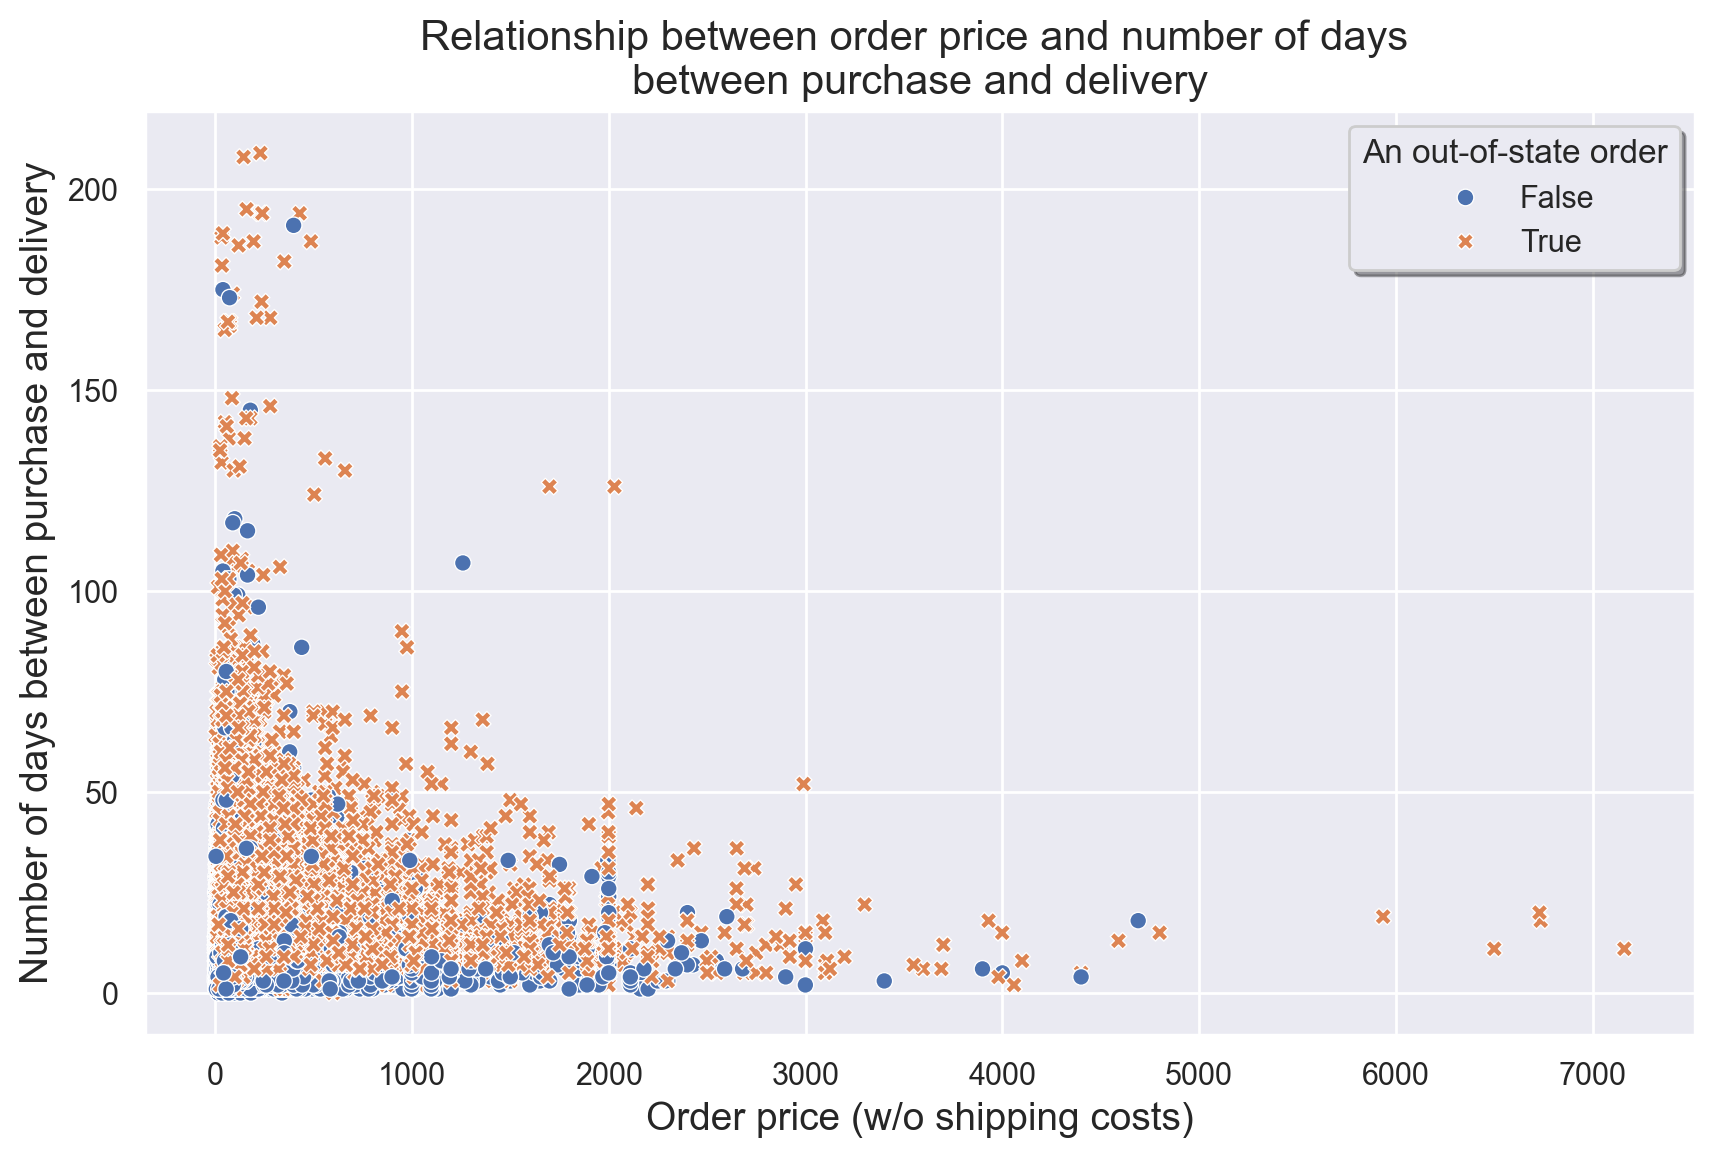

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vis_data_11[vis_data_11['price'] < 10_000],  # delete 1 outlier
                x='price', 
                y='delivery_time_days',
                hue='is_other_state',
                style="is_other_state"
                )

plt.legend(title='An out-of-state order', loc='best', shadow=True)
plt.title('Relationship between order price and number of days \nbetween purchase and delivery', fontsize=15)
plt.xlabel('Order price (w/o shipping costs)', fontsize=14)
plt.ylabel('Number of days between purchase and delivery', fontsize=14)
plt.show()

There is a lot of data, so we can divide it into two charts:

In [62]:
vis_data_11_other_state = vis_data_11[vis_data_11['is_other_state'] == True]
vis_data_11_same_state = vis_data_11[vis_data_11['is_other_state'] == False]

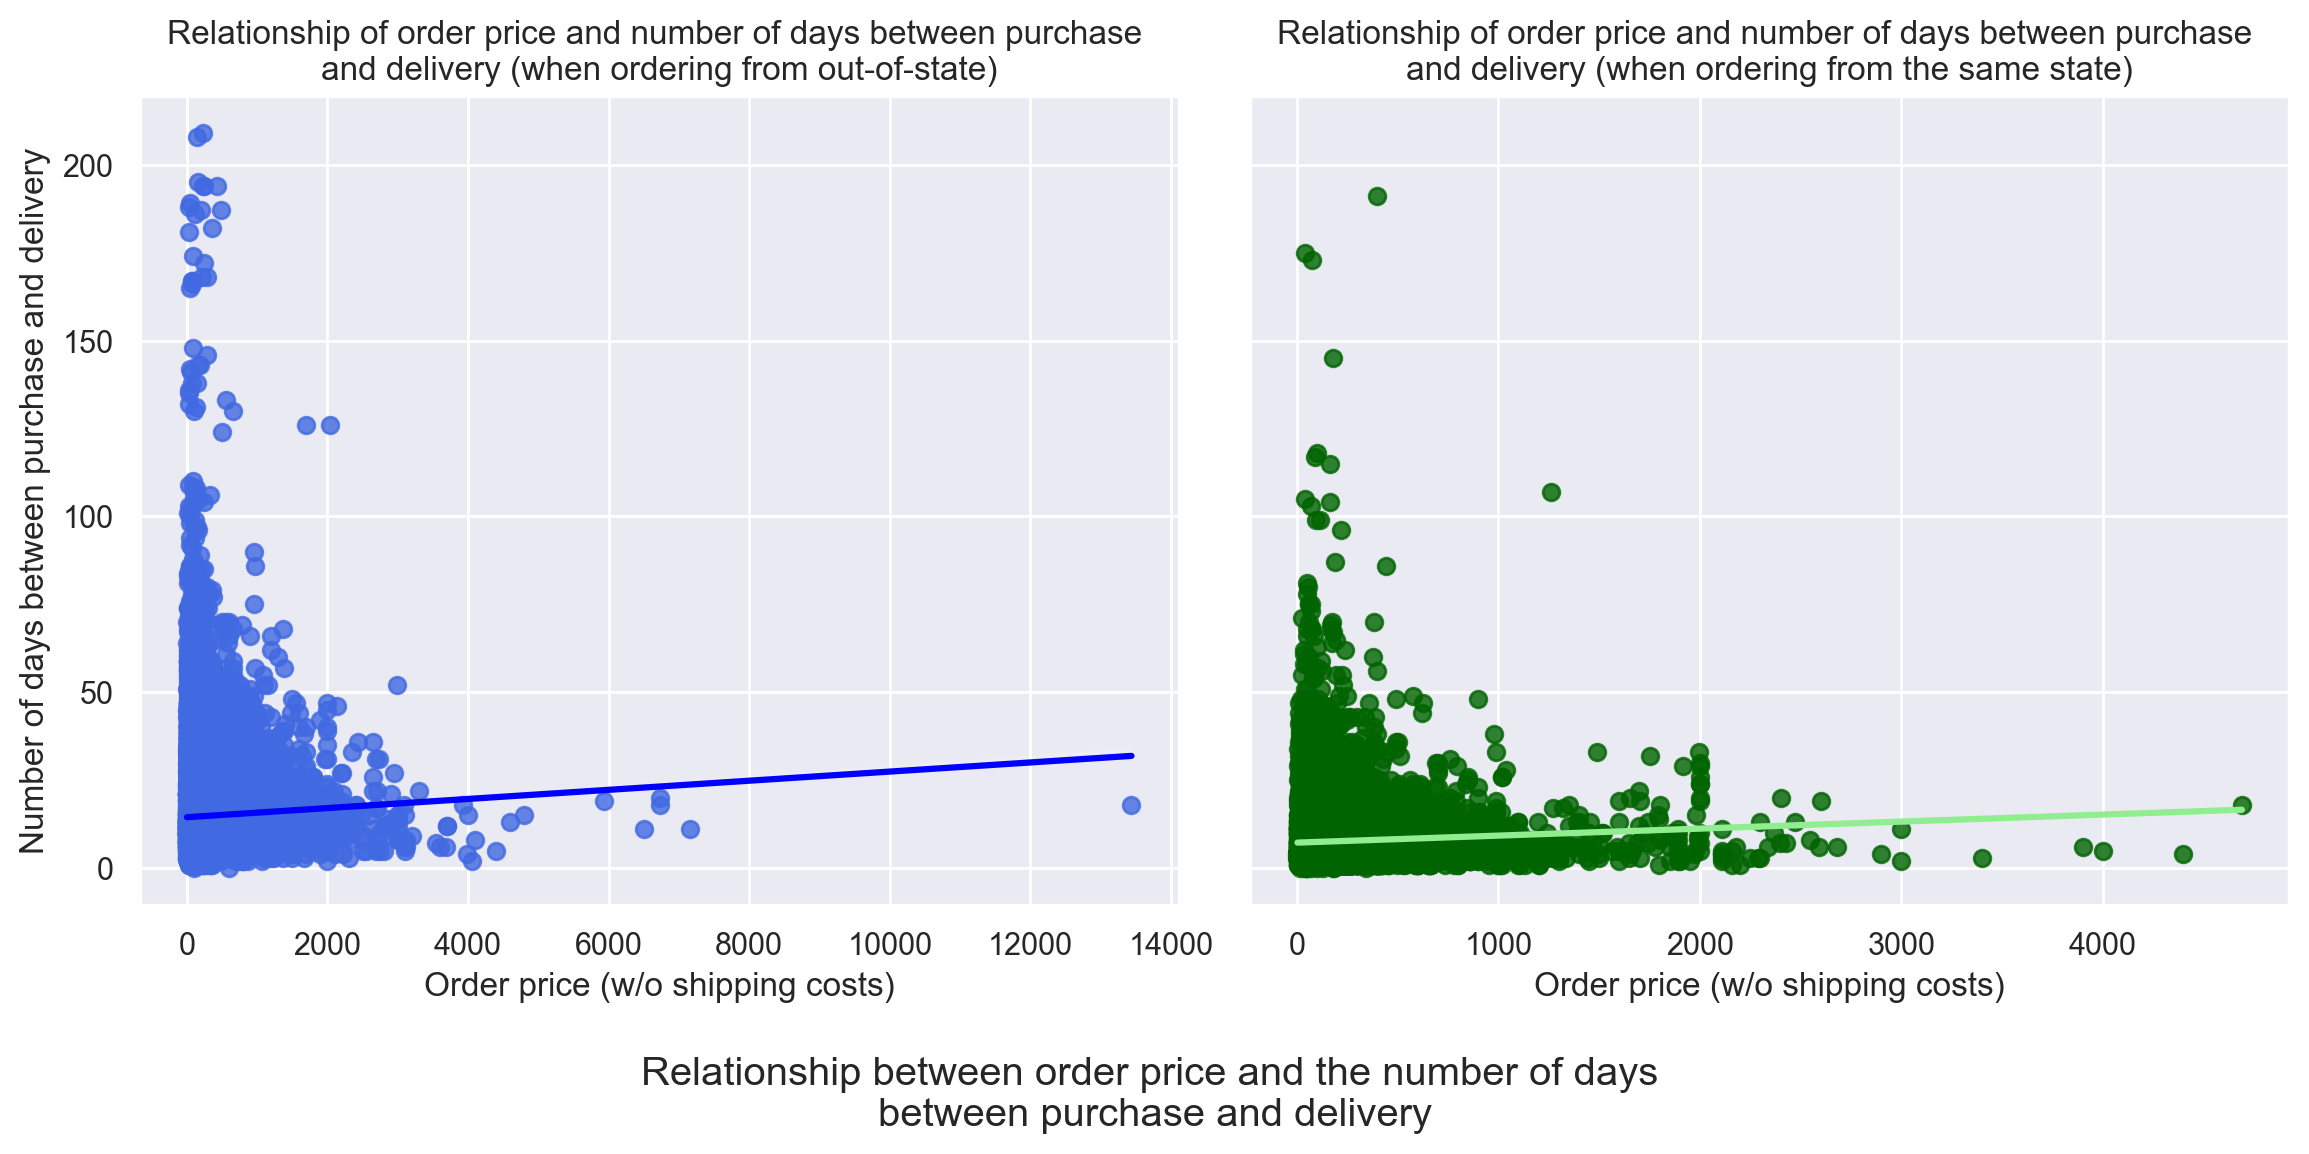

In [84]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 6.5), sharey=True)

sns.regplot(x='price', y='delivery_time_days', data=vis_data_11_other_state, ax=axs[0], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[0].set_ylabel('Number of days between purchase and delivery')
axs[0].set_xlabel('Order price (w/o shipping costs)')
axs[0].set_title('Relationship of order price and number of days between purchase \nand delivery (when ordering from out-of-state)')

sns.regplot(x='price', y='delivery_time_days', data=vis_data_11_same_state, ax=axs[1], n_boot=1, scatter_kws={"color": "darkgreen"}, line_kws={"color": "lightgreen"})
axs[1].set_ylabel('')
axs[1].set_xlabel('Order price (w/o shipping costs)')
axs[1].set_title('Relationship of order price and number of days between purchase \nand delivery (when ordering from the same state)')

fig.suptitle("Relationship between order price and the number of days \nbetween purchase and delivery", y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

Or aggregate by averaging by day of delivery:

In [64]:
vis_data_11_other_state_grouped = vis_data_11_other_state.groupby('delivery_time_days').agg({'price': 'mean'}).reset_index()
vis_data_11_same_state_grouped = vis_data_11_same_state.groupby('delivery_time_days').agg({'price': 'mean'}).reset_index()

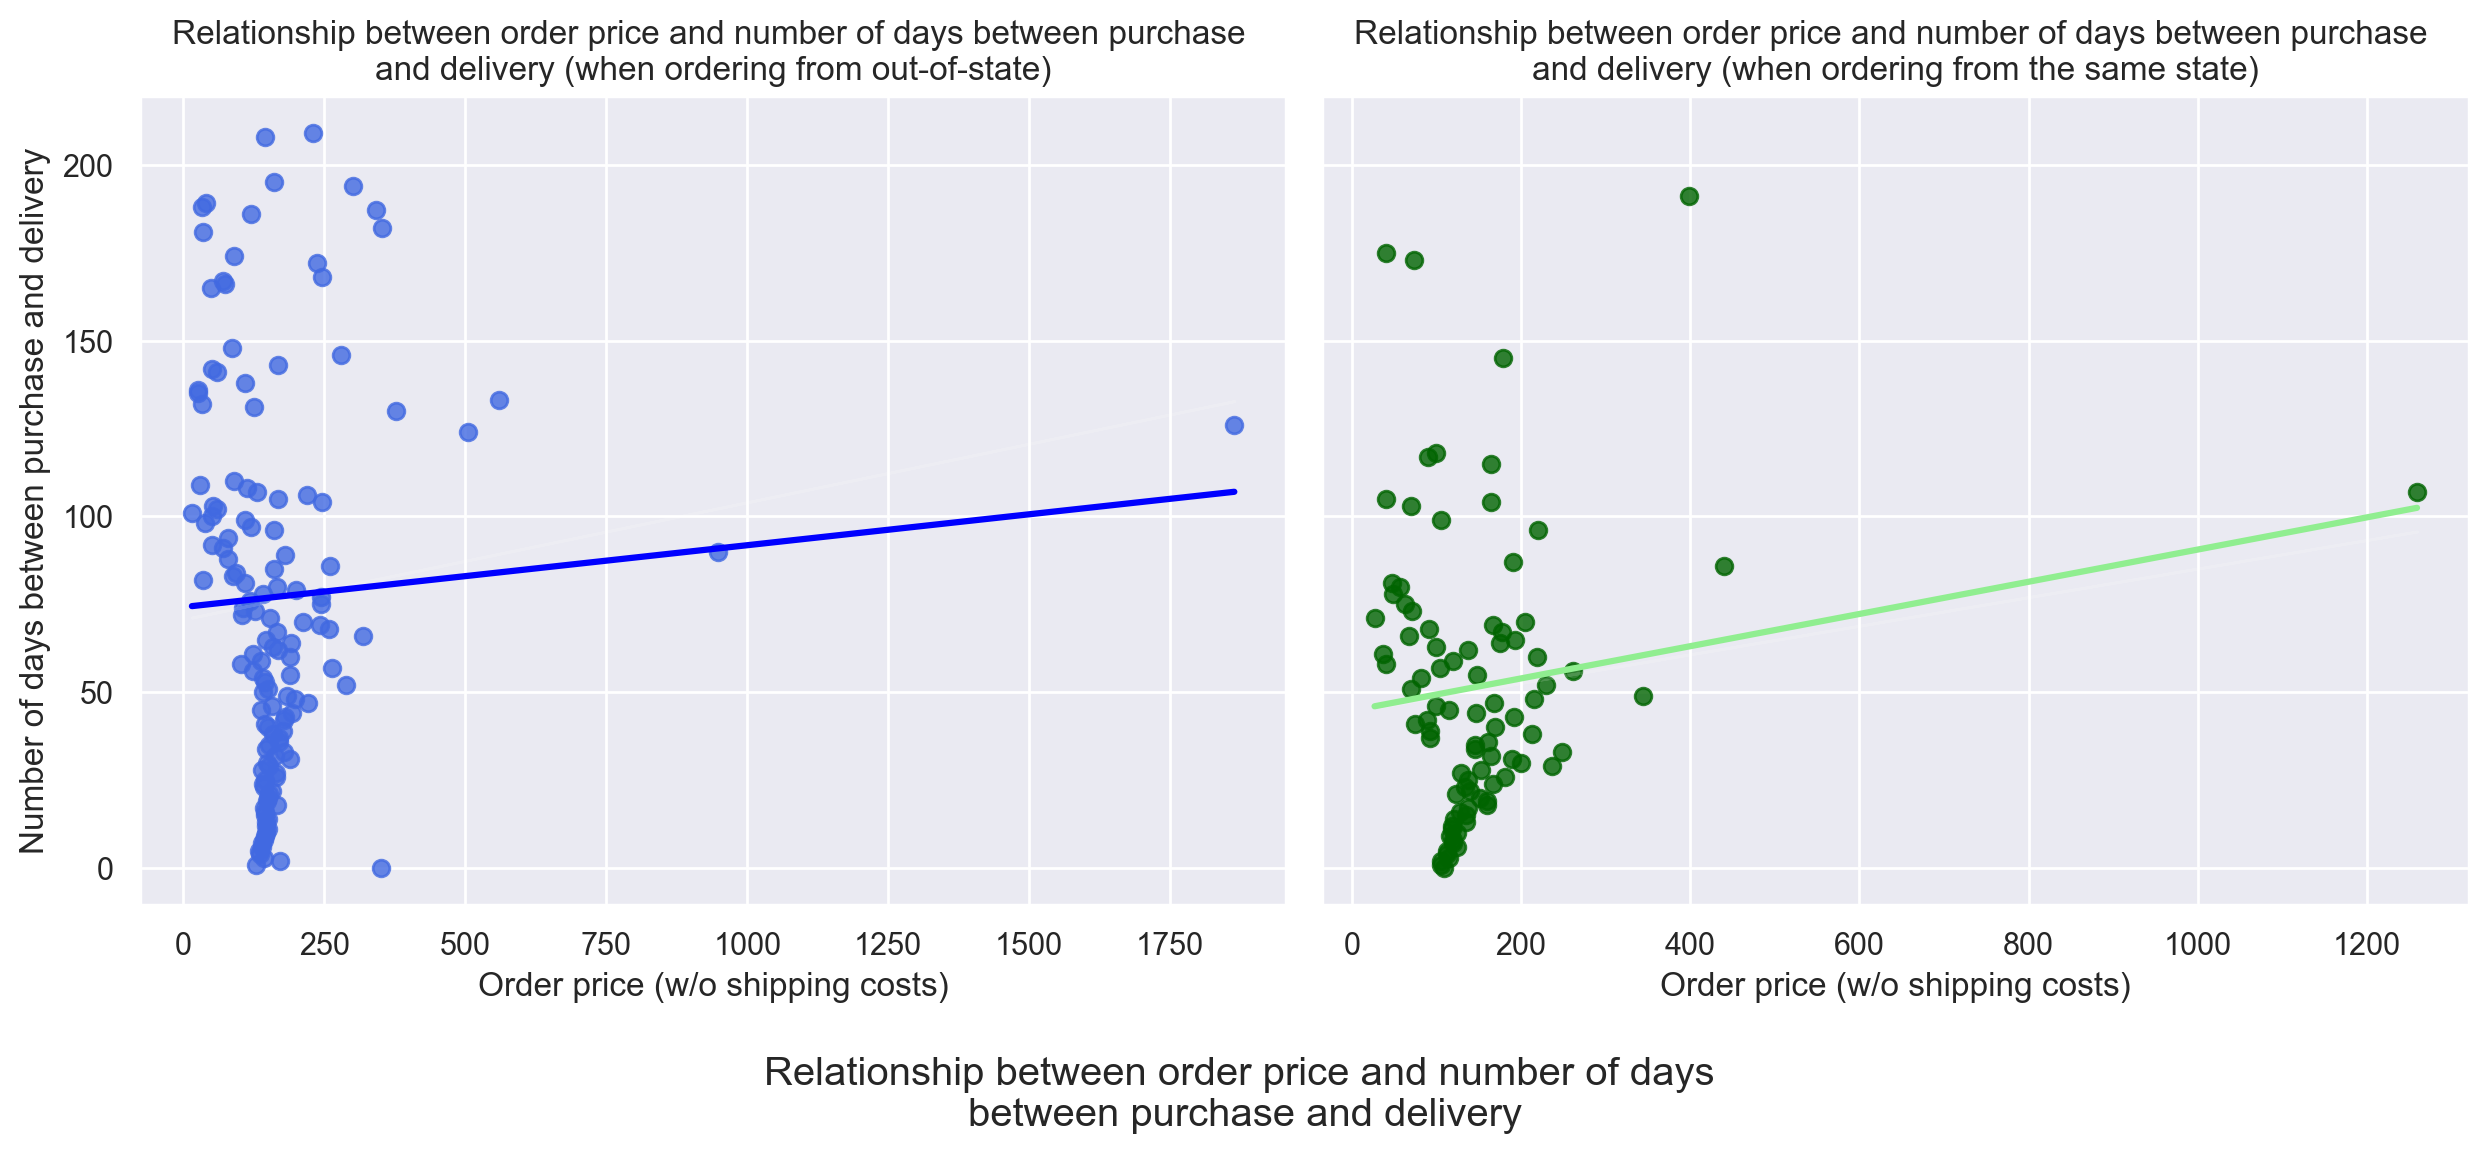

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6.5), sharey=True)

sns.regplot(x='price', y='delivery_time_days', 
            data=vis_data_11_other_state_grouped, 
            ax=axs[0], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[0].set_ylabel('Number of days between purchase and delivery')
axs[0].set_xlabel('Order price (w/o shipping costs)')
axs[0].set_title('Relationship between order price and number of days between purchase \nand delivery (when ordering from out-of-state)')

sns.regplot(x='price', y='delivery_time_days', 
            data=vis_data_11_same_state_grouped, 
            ax=axs[1], n_boot=1, scatter_kws={"color": "darkgreen"}, line_kws={"color": "lightgreen"})
axs[1].set_ylabel('')
axs[1].set_xlabel('Order price (w/o shipping costs)')
axs[1].set_title('Relationship between order price and number of days between purchase \nand delivery (when ordering from the same state)')

fig.suptitle("Relationship between order price and number of days \nbetween purchase and delivery", y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

Overall, *the correlation is very weak*. The only thing that is clearly visible is that orders from other states, on average, take longer to be delivered (this is obvious).

In general, I think it is better to evaluate the results from the first two graphs without aggregation, so as not to lose valuable information. Then when ordering from another state, the relationship between price and the number of days between purchase and delivery is more pronounced. This may be due to various additional costs (not even including shipping costs), e.g. customs costs, putting risk-costs into the price of the goods.